In [1]:
import numpy as np
from historymatch import plot
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.patches import Rectangle
import importlib
import sys
from matplotlib.lines import Line2D
import matplotlib as mpl
from scipy.stats import chi2
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
import matplotlib as mpl
from scipy.stats import chi2

# import internal files
from historymatch import emulators
from historymatch import sample
from historymatch import historymatch
from historymatch import plot
from historymatch import utils



In [2]:


#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=36)     # fontsize of the axes title
#plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
#plt.rc('legend', fontsize=26)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


rc('font',**{'family':'serif'})
rc('text', usetex=True)



plt.rc('font', size=26)          # controls default text sizes
plt.rc('axes', titlesize=28)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=28)    # fontsize of the tick labels
plt.rc('ytick', labelsize=28)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=26)  # fontsize of the figure title

In [3]:
ndim = 5
nwaves = 5

In [4]:
# load analytic results

# wave 1 observables
analytic_mean_wave1 = np.loadtxt("data/5D_analytic_mean_group1.txt").reshape(ndim-1,)
analytic_cov_wave1 = np.loadtxt("data/5D_analytic_cov_group1.txt").reshape(ndim-1,ndim-1)

# wave 2 observables
analytic_mean_wave2 = np.loadtxt("data/5D_analytic_mean_group2.txt").reshape(ndim-1,)
analytic_cov_wave2 = np.loadtxt("data/5D_analytic_cov_group2.txt").reshape(ndim-1,ndim-1)

# wave 3 observables
analytic_mean_wave3 = np.loadtxt("data/5D_analytic_mean_group3.txt").reshape(ndim-1,)
analytic_cov_wave3 = np.loadtxt("data/5D_analytic_cov_group3.txt").reshape(ndim-1,ndim-1)

# wave 4 observables
analytic_mean_wave4 = np.loadtxt("data/5D_analytic_mean_group4.txt").reshape(ndim-1,)
analytic_cov_wave4 = np.loadtxt("data/5D_analytic_cov_group4.txt").reshape(ndim-1,ndim-1)

# final observables
analytic_mean_final = np.loadtxt("data/5D_analytic_mean_final.txt").reshape(ndim,)
analytic_cov_final = np.loadtxt("data/5D_analytic_cov_final.txt").reshape(ndim,ndim)

analytic_means = [analytic_mean_wave1, analytic_mean_wave2, analytic_mean_wave3, analytic_mean_wave4, analytic_mean_final]


In [5]:
# load gaussian nonimplausible samples

gaussian_wave1 = np.loadtxt('data/w1_gaussian_nonimp.txt')
gaussian_wave2 = np.loadtxt('data/w2_gaussian_nonimp.txt')
gaussian_wave3 = np.loadtxt('data/w3_gaussian_nonimp.txt')
gaussian_wave4 = np.loadtxt('data/w4_gaussian_nonimp.txt')
gaussian_wave5 = np.loadtxt('data/w5_gaussian_nonimp.txt')
gaussian_wave6 = np.loadtxt('data/w6_gaussian_nonimp.txt')


In [6]:
# load hypercube nonimplausible samples

gaussian_wave1_samples = np.loadtxt('data/w1_gaussian_samples.txt')
gaussian_wave2_samples = np.loadtxt('data/w2_gaussian_samples.txt')
gaussian_wave3_samples = np.loadtxt('data/w3_gaussian_samples.txt')
gaussian_wave4_samples = np.loadtxt('data/w4_gaussian_samples.txt')
gaussian_wave5_samples = np.loadtxt('data/w5_gaussian_samples.txt')
gaussian_wave6_samples = np.loadtxt('data/w5_gaussian_samples.txt')


In [7]:
ellipsoid_wave1 = np.loadtxt('data/w1_ellipsoid_nonimp.txt')
ellipsoid_wave2 = np.loadtxt('data/w2_ellipsoid_nonimp.txt')
ellipsoid_wave3 = np.loadtxt('data/w3_ellipsoid_nonimp.txt')
ellipsoid_wave4 = np.loadtxt('data/w4_ellipsoid_nonimp.txt')
ellipsoid_wave5 = np.loadtxt('data/w5_ellipsoid_nonimp.txt')
ellipsoid_wave6 = np.loadtxt('data/w6_ellipsoid_nonimp.txt')


In [8]:
ellipsoid_wave1_samples = np.loadtxt('data/w1_ellipsoid_samples.txt')
ellipsoid_wave2_samples = np.loadtxt('data/w2_ellipsoid_samples.txt')
ellipsoid_wave3_samples = np.loadtxt('data/w3_ellipsoid_samples.txt')
ellipsoid_wave4_samples = np.loadtxt('data/w4_ellipsoid_samples.txt')
ellipsoid_wave5_samples = np.loadtxt('data/w5_ellipsoid_samples.txt')
ellipsoid_wave6_samples = np.loadtxt('data/w5_ellipsoid_samples.txt')

In [9]:
# load hypercube nonimplausible samples

hypercube_wave1 = np.loadtxt('data/w1_hypercube_nonimp.txt')
hypercube_wave2 = np.loadtxt('data/w2_hypercube_nonimp.txt')
hypercube_wave3 = np.loadtxt('data/w3_hypercube_nonimp.txt')
hypercube_wave4 = np.loadtxt('data/w4_hypercube_nonimp.txt')
hypercube_wave5 = np.loadtxt('data/w5_hypercube_nonimp.txt')
hypercube_wave6 = np.loadtxt('data/w6_hypercube_nonimp.txt')

In [10]:
# load hypercube samples

#hypercube_rot_wave1_samples = np.loadtxt('data/w1_hypercube_rot_samples.txt')
hypercube_wave2_samples = np.loadtxt('data/w2_hypercube_samples.txt')
hypercube_wave3_samples = np.loadtxt('data/w3_hypercube_samples.txt')
hypercube_wave4_samples = np.loadtxt('data/w4_hypercube_samples.txt')
hypercube_wave5_samples = np.loadtxt('data/w5_hypercube_samples.txt')
hypercube_wave6_samples = np.loadtxt('data/w6_hypercube_samples.txt')

hypercube_samples = [hypercube_wave2_samples, hypercube_wave2_samples, hypercube_wave3_samples, \
                         hypercube_wave4_samples, hypercube_wave5_samples, hypercube_wave6_samples]



In [11]:
# load hypercube nonimplausible samples

hypercube_rot_wave1 = np.loadtxt('data/w1_hypercube_rot_nonimp.txt')
hypercube_rot_wave2 = np.loadtxt('data/w2_hypercube_rot_nonimp.txt')
hypercube_rot_wave3 = np.loadtxt('data/w3_hypercube_rot_nonimp.txt')
hypercube_rot_wave4 = np.loadtxt('data/w4_hypercube_rot_nonimp.txt')
hypercube_rot_wave5 = np.loadtxt('data/w5_hypercube_rot_nonimp.txt')
hypercube_rot_wave6 = np.loadtxt('data/w6_hypercube_rot_nonimp.txt')
hypercube_rot_wave7 = np.loadtxt('data/w6_hypercube_rot_nonimp.txt')

hypercube_rot_nonimplausible = [hypercube_rot_wave1, hypercube_rot_wave2, hypercube_rot_wave3, \
                                hypercube_rot_wave4, hypercube_rot_wave5, hypercube_rot_wave6, hypercube_rot_wave7]

In [12]:
# load hypercube nonimplausible samples

hypercube_rot_wave1_samples = np.loadtxt('data/w1_hypercube_rot_samples.txt')
hypercube_rot_wave2_samples = np.loadtxt('data/w2_hypercube_rot_samples.txt')
hypercube_rot_wave3_samples = np.loadtxt('data/w3_hypercube_rot_samples.txt')
hypercube_rot_wave4_samples = np.loadtxt('data/w4_hypercube_rot_samples.txt')
hypercube_rot_wave5_samples = np.loadtxt('data/w5_hypercube_rot_samples.txt')
hypercube_rot_wave6_samples = np.loadtxt('data/w6_hypercube_rot_samples.txt')
hypercube_rot_wave7_samples = np.loadtxt('data/w6_hypercube_rot_samples.txt')



 /tmp/ipykernel_80280/3124073142.py:3: UserWarning:loadtxt: Empty input file: "data/w1_hypercube_rot_samples.txt"


In [13]:
hypercube_rot_samples = [hypercube_rot_wave2_samples, hypercube_rot_wave3_samples, hypercube_rot_wave4_samples, hypercube_rot_wave5_samples, hypercube_rot_wave6_samples, hypercube_rot_wave7_samples]

In [14]:

hypercube_nonimplausible = [hypercube_wave1, hypercube_wave2, hypercube_wave3, hypercube_wave4, hypercube_wave5, hypercube_wave6]

In [15]:
100*len(ellipsoid_wave4)/len(ellipsoid_wave4_samples)

3.9402

In [16]:
gaussian_nonimplausible = [gaussian_wave1, gaussian_wave2, gaussian_wave3, gaussian_wave4, gaussian_wave5, gaussian_wave6]
gaussian_samples = [gaussian_wave1_samples, gaussian_wave2_samples, gaussian_wave3_samples, \
                         gaussian_wave4_samples, gaussian_wave5_samples, gaussian_wave6_samples]

In [17]:
ellipsoid_nonimplausible = [ellipsoid_wave1, ellipsoid_wave2, ellipsoid_wave3, ellipsoid_wave4, ellipsoid_wave5, ellipsoid_wave6]
ellipsoid_samples = [ellipsoid_wave1_samples, ellipsoid_wave2_samples, ellipsoid_wave3_samples, \
                         ellipsoid_wave4_samples, ellipsoid_wave5_samples, ellipsoid_wave6_samples]



In [18]:
# define initial parameter volume

av_bound = np.array([0, 40]).reshape(1,-1)
as_bound = np.array([-50, 0]).reshape(1,-1)
ac_bound = np.array([-3, 3]).reshape(1,-1)
aa_bound = np.array([-50, 0]).reshape(1,-1) # keep
ap_bound = np.array([-0, 40]).reshape(1,-1)

initial_parameter_bounds = np.concatenate((av_bound, as_bound, \
                                   ac_bound, aa_bound, ap_bound), axis=0)

In [19]:
40*50*6*50

600000

In [20]:
# create arrays of parameter ranges for plotting

av_values = np.linspace(av_bound[0][0], av_bound[0][1], 500)
as_values = np.linspace(as_bound[0][0], as_bound[0][1], 500)
ac_values = np.linspace(ac_bound[0][0], ac_bound[0][1], 500)
aa_values = np.linspace(aa_bound[0][0], aa_bound[0][1], 500)
ap_values = np.linspace(ap_bound[0][0], ap_bound[0][1], 500)

parameter_ranges = np.concatenate((av_values.reshape(1,-1), as_values.reshape(1,-1), ac_values.reshape(1,-1), \
                                  aa_values.reshape(1,-1), ap_values.reshape(1,-1)), axis=0)

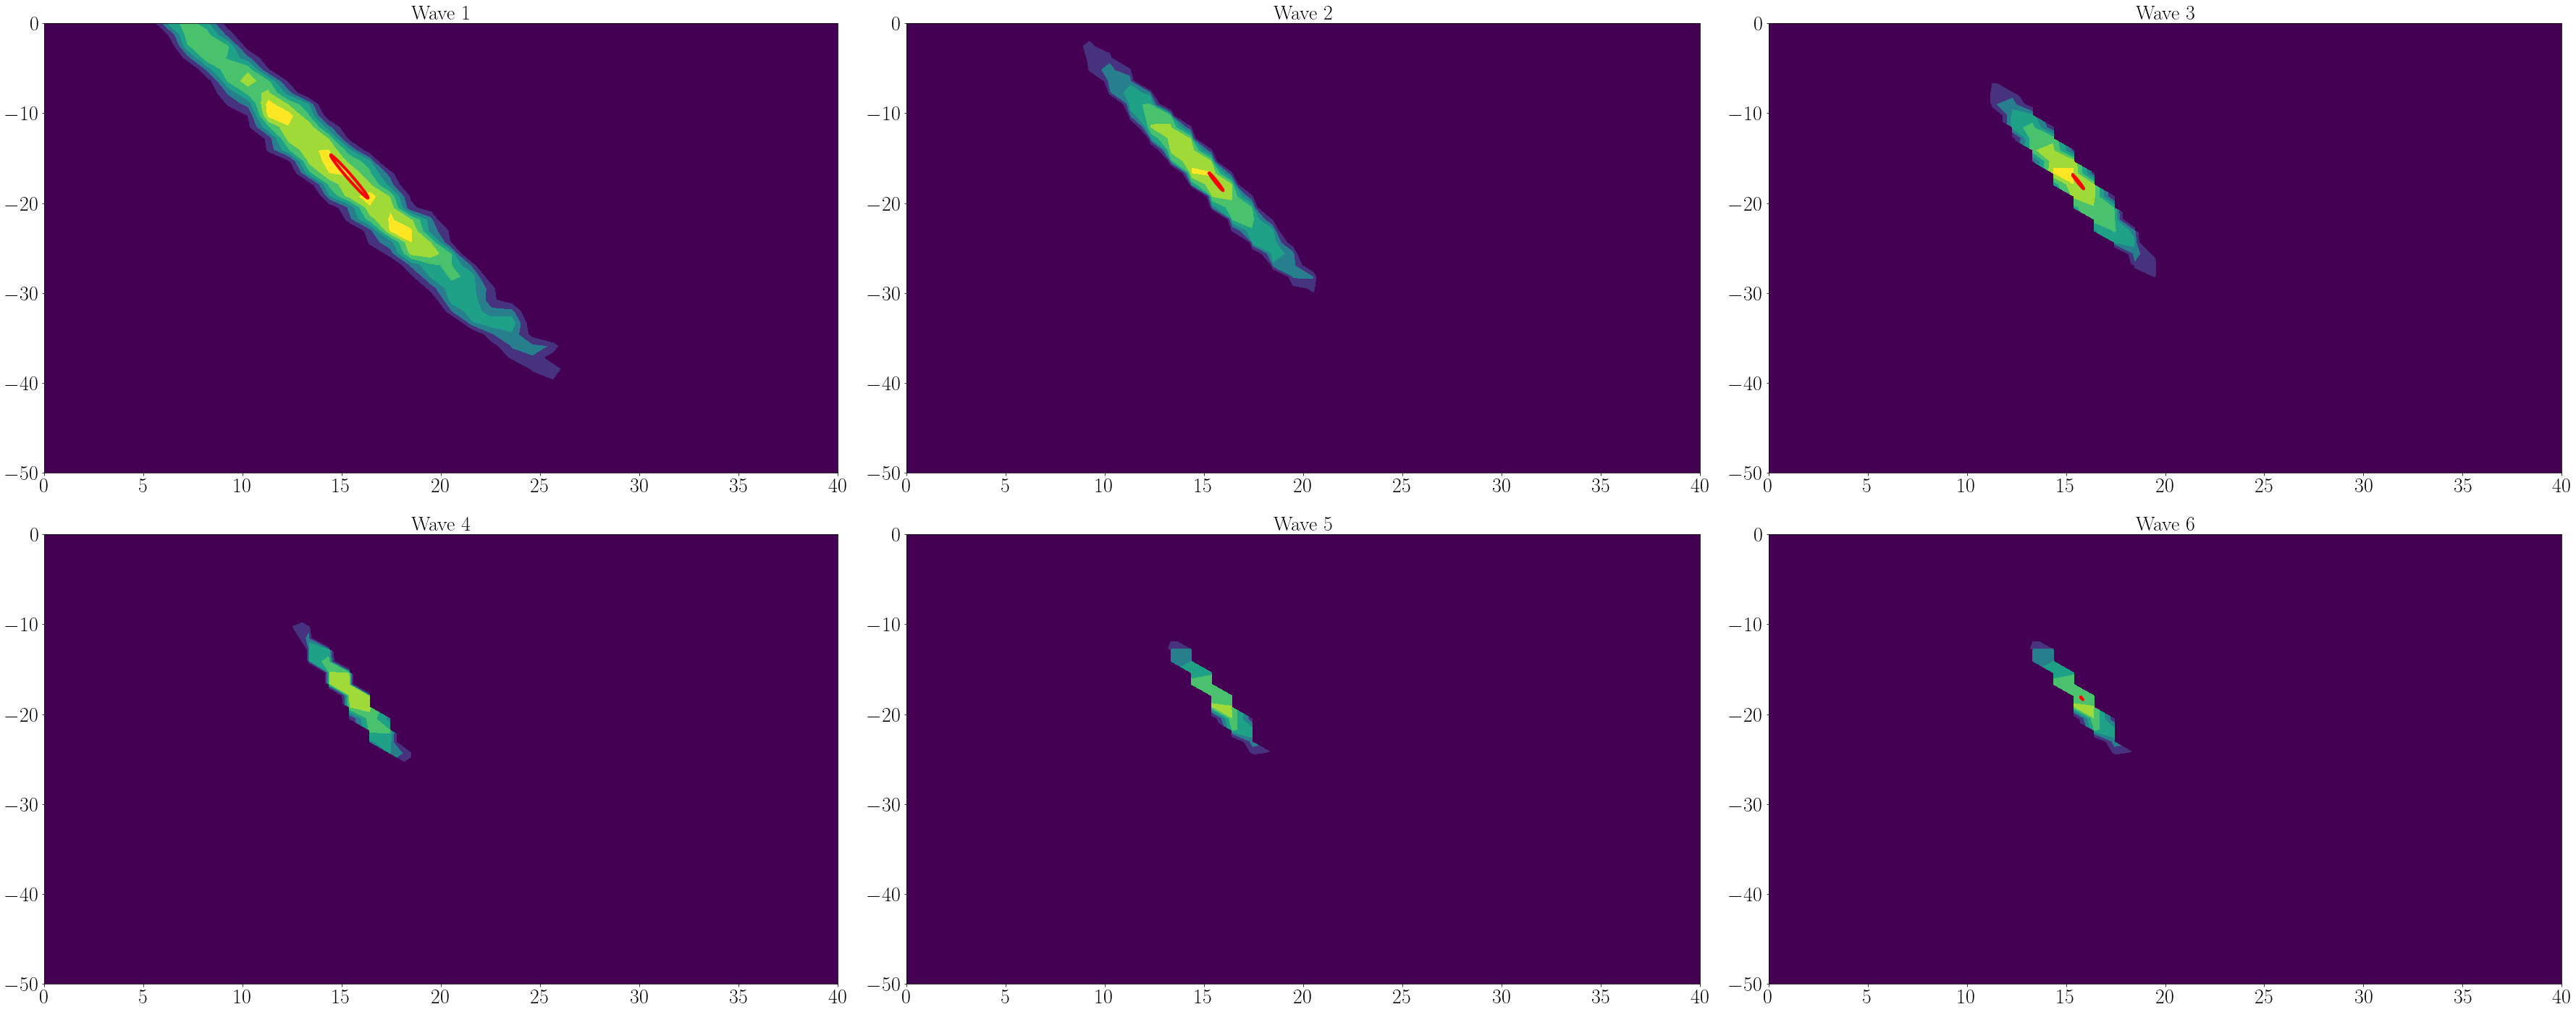

In [21]:
# plot gaussian implausibility

importlib.reload(plot)

fig, axes = plt.subplots(2,3,figsize=(50,20))

#axes[0,0].get_shared_x_axes().join(axes[0,0], axes[1,0])
#axes[0,1].get_shared_x_axes().join(axes[0,1], axes[1,1])
#axes[0,2].get_shared_x_axes().join(axes[0,2], axes[1,2])
#axes[0,0].sharex(axes[1,0])
#axes[0,1].sharex(axes[1,1])
#axes[0,2].sharex(axes[1,2])

plot.plot_implausibility2D(gaussian_wave1_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[0,0]),colorbar=False)
plot.plot_implausibility2D(gaussian_wave2_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[0,1]),colorbar=False)
plot.plot_implausibility2D(gaussian_wave3_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[0,2]),colorbar=False)
plot.plot_implausibility2D(gaussian_wave4_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[1,0]),colorbar=False)
plot.plot_implausibility2D(gaussian_wave5_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[1,1]),colorbar=False)
plot.plot_implausibility2D(gaussian_wave6_samples, np.concatenate((av_bound, as_bound), axis=0), [0,1],\
                               bins=40, Fig=(fig,axes[1,2]),colorbar=False)

    
axes[0,0].set_title('Wave 1')
axes[0,1].set_title('Wave 2')
axes[0,2].set_title('Wave 3')
axes[1,0].set_title('Wave 4')
axes[1,1].set_title('Wave 5')
axes[1,2].set_title('Wave 6')

true_cov = np.array([[analytic_cov_wave1[0,0], analytic_cov_wave1[0,1]],[analytic_cov_wave1[1,0], analytic_cov_wave1[1,1]]])
plot.get_cov_ellipse(true_cov, [analytic_mean_wave1[0],analytic_mean_wave1[1]], 3, 5.991, axes[0,0], 'red', '-', lw=4)

true_cov = np.array([[analytic_cov_wave2[0,0], analytic_cov_wave2[0,1]],[analytic_cov_wave2[1,0], analytic_cov_wave2[1,1]]])
plot.get_cov_ellipse(true_cov, [analytic_mean_wave2[0],analytic_mean_wave2[1]], 3, 5.991, axes[0,1], 'red', '-', lw=4)

true_cov = np.array([[analytic_cov_wave3[0,0], analytic_cov_wave3[0,1]],[analytic_cov_wave3[1,0], analytic_cov_wave3[1,1]]])
plot.get_cov_ellipse(true_cov, [analytic_mean_wave3[0],analytic_mean_wave3[1]], 3, 5.991, axes[0,2], 'red', '-', lw=4)

#true_cov = np.array([[analytic_cov_wave1[0,0], analytic_cov_wave1[0,1]],[analytic_cov_wave1[1,0], analytic_cov_wave1[1,1]]])
#plot.get_cov_ellipse(true_cov, [analytic_mean_wave1[0],analytic_mean_wave1[1]], 3, 5.991, axes[0,0], 'red', '-', lw=4)

true_cov = np.array([[analytic_cov_final[0,0], analytic_cov_final[0,1]],[analytic_cov_final[1,0], analytic_cov_final[1,1]]])
plot.get_cov_ellipse(true_cov, [analytic_mean_final[0],analytic_mean_final[1]], 3, 5.991, axes[1,2], 'red', '-', lw=4)

fig.tight_layout()
plt.savefig('figures/gaussian_waves.png', bbox_inches='tight', facecolor='white', transparent=False)



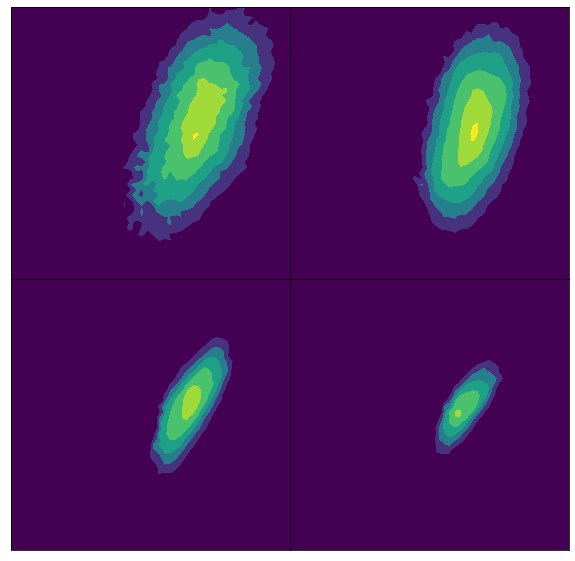

In [22]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

#axes[0,0].get_shared_x_axes().join(axes[0,0], axes[1,0])
#axes[0,1].get_shared_x_axes().join(axes[0,1], axes[1,1])
#axes[0,2].get_shared_x_axes().join(axes[0,2], axes[1,2])
#axes[0,0].sharex(axes[1,0])
#axes[0,1].sharex(axes[1,1])
#axes[0,2].sharex(axes[1,2])

plot.plot_implausibility2D(gaussian_wave2_samples, np.concatenate((as_bound, aa_bound), axis=0), [1,3],\
                               bins=50, Fig=(fig,axes[0,0]),colorbar=False)
axes[0,0].axes.yaxis.set_visible(False)
axes[0,0].axes.xaxis.set_visible(False)

plot.plot_implausibility2D(gaussian_wave3_samples, np.concatenate((as_bound, aa_bound), axis=0), [1,3],\
                               bins=50, Fig=(fig,axes[0,1]),colorbar=False)
axes[0,1].axes.yaxis.set_visible(False)
axes[0,1].axes.xaxis.set_visible(False)

plot.plot_implausibility2D(gaussian_wave4_samples, np.concatenate((as_bound, aa_bound), axis=0), [1,3],\
                               bins=50, Fig=(fig,axes[1,0]),colorbar=False)
axes[1,0].axes.yaxis.set_visible(False)
axes[1,0].axes.xaxis.set_visible(False)

plot.plot_implausibility2D(gaussian_wave5_samples, np.concatenate((as_bound, aa_bound), axis=0), [1,3],\
                               bins=50, Fig=(fig,axes[1,1]),colorbar=False)
axes[1,1].axes.yaxis.set_visible(False)
axes[1,1].axes.xaxis.set_visible(False)


fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/cover_page.png', bbox_inches='tight', facecolor='white', transparent=False)

In [23]:
# check number implaus in each wave

for k in range(6):
    print('Wave ' + str(k))
    print('Hypercube : ' + str(100*hypercube_nonimplausible[k].shape[0]/(6*(10**6))))
    print('Hypercube Rotated: ' + str(100*hypercube_rot_nonimplausible[k].shape[0]/(2*(10**6))))
    print('Gaussian : ' + str(100*gaussian_nonimplausible[k].shape[0]/(2*(10**5))))

Wave 0
Hypercube : 0.10573333333333333
Hypercube Rotated: 0.0338
Gaussian : 0.3125
Wave 1
Hypercube : 0.009816666666666666
Hypercube Rotated: 0.2137
Gaussian : 13.4415
Wave 2
Hypercube : 0.0848
Hypercube Rotated: 26.7599
Gaussian : 221.4065
Wave 3
Hypercube : 0.027066666666666666
Hypercube Rotated: 7.2302
Gaussian : 93.4955
Wave 4
Hypercube : 0.006166666666666667
Hypercube Rotated: 6.8796
Gaussian : 34.828
Wave 5
Hypercube : 0.1042
Hypercube Rotated: 50.11075
Gaussian : 395.907


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

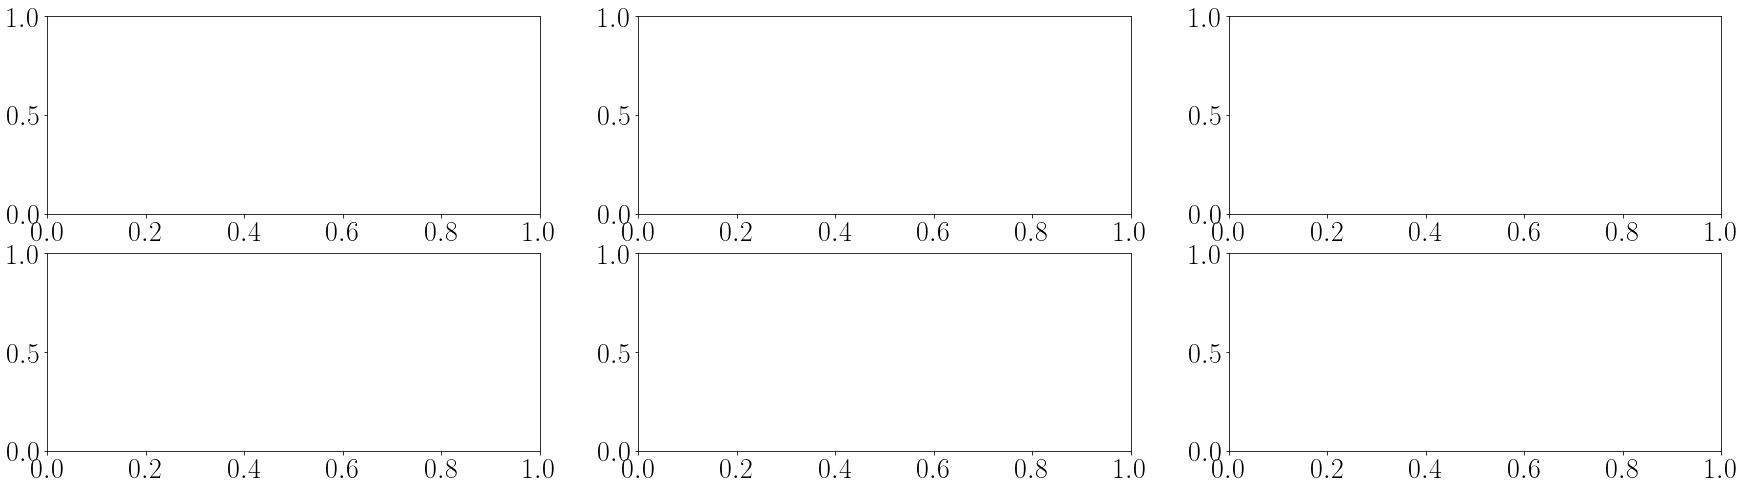

In [24]:
# plot rotated hypercube results

fig, axes = plt.subplots(2,3,figsize=(30,8))

plot.plot_implausibility2D(hypercube_rot_wave1_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[0,0]),colorbar=False)
plot.plot_implausibility2D(hypercube_rot_wave2_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[0,1]),colorbar=False)
plot.plot_implausibility2D(hypercube_rot_wave3_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[0,2]),colorbar=False)
plot.plot_implausibility2D(hypercube_rot_wave4_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[1,0]),colorbar=False)
plot.plot_implausibility2D(hypercube_rot_wave5_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[1,1]),colorbar=False)
plot.plot_implausibility2D(hypercube_rot_wave6_samples, initial_parameter_bounds, [0,1],\
                               bins=20, Fig=(fig,axes[1,2]),colorbar=False)

    
axes[0,0].set_title('Wave 1')
axes[0,1].set_title('Wave 2')
axes[0,2].set_title('Wave 3')
#plt.savefig('figures/gaussian_waves.png', bbox_inches='tight', facecolor='white', transparent=False)

true_cov = np.array([[analytic_cov_final[0,0], analytic_cov_final[0,1]],[analytic_cov_final[1,0], analytic_cov_final[1,1]]])
plot.get_cov_ellipse(true_cov, [analytic_mean_final[0],analytic_mean_final[1]], 3, 5.991, axes[1,2], 'red')


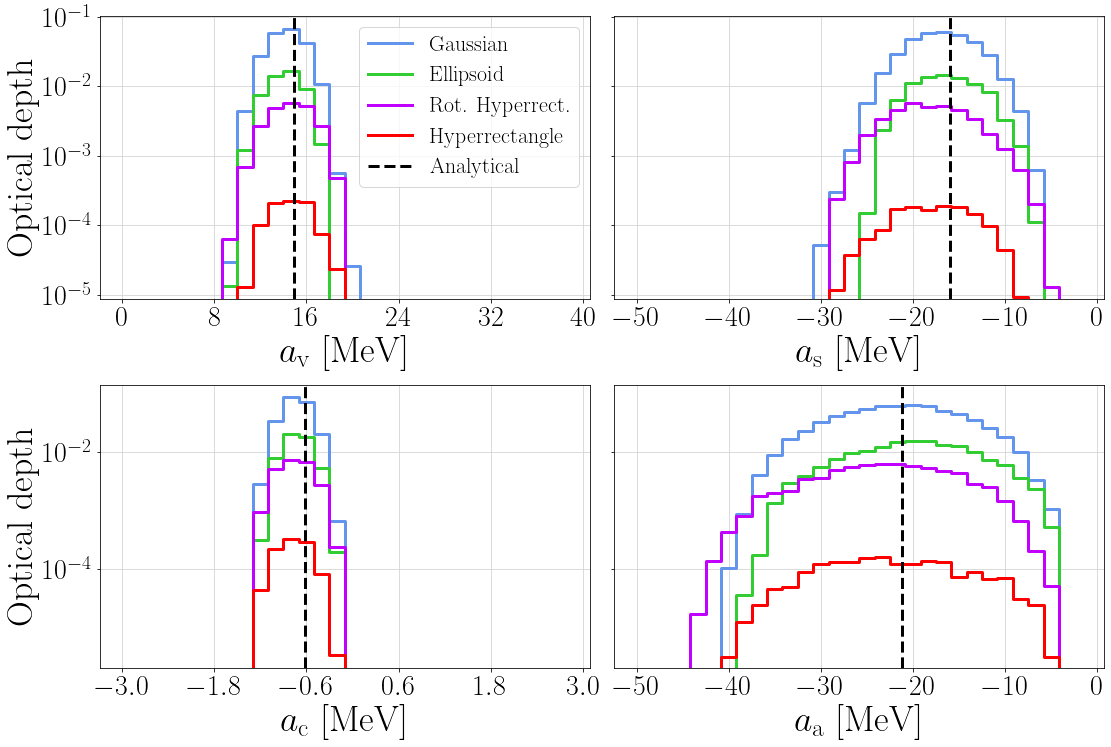

In [24]:
# plot 1d optical depths - wave 2

true_wave_2 = [14.9136598,  -15.9737375,  -0.62341821, -21.23962237]

true_wave_3 = [ 15.37616712, -17.05061316,  -0.67801823, -22.53571774]

true_wave_4 = [ 15.6172671,  -17.63377869,  -0.70505274, -22.88765386]

#[15.66756039, -17.78825237,  -0.70925804, -22.93282687]
importlib.reload(plot)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,12),sharey='row')
theta_names = [r'$a_{\mathrm{v}}$ [MeV]', r'$a_{\mathrm{s}}$ [MeV]', r'$a_{\mathrm{c}}$ [MeV]', r'$a_{\mathrm{a}}$ [MeV]', r'$a_{\mathrm{p}}$ [MeV]']

axes = (ax1,ax2,ax3,ax4)

for i in [0]:
    plot.opticaldepth_1D(gaussian_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'cornflowerblue', 'linewidth':3, 'alpha':1, 'label':'Gaussian'})
    plot.opticaldepth_1D(ellipsoid_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'limegreen', 'linewidth':3, 'alpha':1, 'label':'Ellipsoid'})
    plot.opticaldepth_1D(hypercube_rot_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'#c100ff', 'linewidth':3, 'alpha':1, 'label':'Rot. Hyperrect.'})
    plot.opticaldepth_1D(hypercube_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'red', 'linewidth':3, 'alpha':1, 'label':'Hyperrectangle'})
    axes[i].grid(color='lightgrey')
    axes[i].axvline(true_wave_2[i], color='black', linestyle='--', linewidth=3, label='Analytical')
    
for i in [1,2,3]:
    plot.opticaldepth_1D(gaussian_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'cornflowerblue', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(ellipsoid_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'limegreen', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(hypercube_rot_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'#c100ff', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(hypercube_wave2_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'red', 'linewidth':3, 'alpha':1})
    axes[i].grid(color='lightgrey')
    axes[i].axvline(true_wave_2[i], color='black', linestyle='--', linewidth=3)
    
axes[0].set_xticks([0,8,16,24,32,40])
axes[1].set_xticks([-50,-40,-30,-20,-10, 0])
axes[2].set_xticks([-3,-1.8,-0.6,0.6,1.8,3])
axes[3].set_xticks([-50,-40,-30,-20,-10, 0])

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[3].set_yscale('log')

axes[0].set_yticks([10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)])

axes[0].set_ylabel('Optical depth')
axes[2].set_ylabel('Optical depth')

axes[0].legend(loc='best')

fig.subplots_adjust(wspace=0.05, hspace=0.3)
#fig.tight_layout()

plt.savefig('figures/opticaldepth_wave2.pdf', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
# plot 1d optical depths - wave 3

importlib.reload(plot)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,12),sharey='row')
theta_names = [r'$a_{\mathrm{v}}$', r'$a_{\mathrm{s}}$', r'$a_{\mathrm{c}}$', r'$a_{\mathrm{a}}$', r'$a_{\mathrm{p}}$']

axes = (ax1,ax2,ax3,ax4)

for i in [0]:
    plot.opticaldepth_1D(gaussian_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'cornflowerblue', 'linewidth':3, 'alpha':1, 'label':'Gaussian'})
    plot.opticaldepth_1D(ellipsoid_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'limegreen', 'linewidth':3, 'alpha':1, 'label':'Ellipsoid'})
    plot.opticaldepth_1D(hypercube_rot_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'#c100ff', 'linewidth':3, 'alpha':1, 'label':'Rot. Hypercube'})
    plot.opticaldepth_1D(hypercube_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'red', 'linewidth':3, 'alpha':1, 'label':'Hypercube'})
    axes[i].grid(color='lightgrey')
    axes[i].axvline(true_wave_2[i], color='black', linestyle='--', linewidth=3, label='Analytical')
    
for i in [1,2,3]:
    plot.opticaldepth_1D(gaussian_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'cornflowerblue', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(ellipsoid_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'limegreen', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(hypercube_rot_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'#c100ff', 'linewidth':3, 'alpha':1})
    plot.opticaldepth_1D(hypercube_wave4_samples, initial_parameter_bounds[i], i, bins=30, normalize=True, Fig=(fig, axes[i]), label=theta_names[i], plot_kwargs={'color':'red', 'linewidth':3, 'alpha':1})
    axes[i].grid(color='lightgrey')
    axes[i].axvline(true_wave_4[i], color='black', linestyle='--', linewidth=3)
    axes[i].axvline(true_wave_2[i], color='pink', linestyle='--', linewidth=3)
    
axes[0].set_xticks([0,8,16,24,32,40])
axes[1].set_xticks([-50,-40,-30,-20,-10, 0])
axes[2].set_xticks([-3,-1.8,-0.6,0.6,1.8,3])
axes[3].set_xticks([-50,-40,-30,-20,-10, 0])

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[3].set_yscale('log')

axes[0].set_yticks([10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)])

axes[0].set_ylabel('Optical depth')
axes[2].set_ylabel('Optical depth')

axes[0].legend(loc='best')

fig.subplots_adjust(wspace=0.05, hspace=0.3)
#fig.tight_layout()

plt.savefig('figures/opticaldepth_wave4.pdf', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
# rotated hypercube volumes

initial_volume = 1
for dim in range(ndim):
    initial_volume *= np.abs(initial_parameter_bounds[dim][1] - initial_parameter_bounds[dim][0])
    
print('Initial Parameter Volume : ' + str(initial_volume))

for wave in range(6):
    wavesamples = hypercube_rot_samples[wave]
    # rotate rotated hypercube
    eigvals, eigvecs = np.linalg.eig(np.cov(wavesamples[:,:-1].T))
    R = eigvecs.T
    nonimp_str = wavesamples[:,:-1].dot(np.linalg.inv(R))


    if wave > 4:
        hypercube_rot_final_bounds = utils.locate_boundaries(nonimp_str, ndim)
        hypercube_rot_volume = 1
        for dim in range(ndim):
            hypercube_rot_volume *= np.abs(hypercube_rot_final_bounds[dim][1] - hypercube_rot_final_bounds[dim][0])
    else:
        hypercube_rot_final_bounds = utils.locate_boundaries(nonimp_str, ndim-1)
        hypercube_rot_volume = 1
        for dim in range(ndim-1):
            hypercube_rot_volume *= np.abs(hypercube_rot_final_bounds[dim][1] - hypercube_rot_final_bounds[dim][0])
    # ******* is this correct??? *********
    print('Rotated hypercube Volume Remaining (Wave {}) : '.format(wave+1) + str(hypercube_rot_volume/initial_volume) + ' %')
    

In [ ]:
#  plot final wave 1D comparison

fig, axes = plt.subplots(5, 1, figsize=(40,40))

# compute covariance matrix on nonimplausible samples
historymatch_cov = np.cov(gaussian_wave5[:,:-1].T)

# compute bounds of HC nonimplausible samples
final_bounds_hypercube = utils.locate_boundaries(hypercube_wave6, 5)

theta_names = [r'$a_{\mathrm{v}}$', r'$a_{\mathrm{s}}$', r'$a_{\mathrm{c}}$', r'$a_{\mathrm{a}}$', r'$a_{\mathrm{p}}$']
#theta_names = [r'$a_{\textrm{v}}$', r'$a_{\textrm{s}}$', r'$a_{\textrm{c}}$', r'$a_{\textrm{a}}$', r'$a_{\textrm{p}}$']

for dim in range(ndim):
    ax = axes[dim]
    # twin axes to compare unnormalised distributions
    ax_right = ax.twinx()
    
    a_range = parameter_ranges[dim]
    a_OLS = analytic_mean_final[dim]
    a_cov_OLS = analytic_cov_final[dim,dim]
    
    # plot analytic likelihood
    ax.plot(a_range, stats.norm.pdf(a_range, a_OLS, np.sqrt(a_cov_OLS)), color='black', linewidth=3, label='Analytical Solution')
    
    
    # compute covariance and mean of nonimplausible samples
    historymatch_mean = np.mean(gaussian_wave5[:,dim])
    
    
    # plot history matching result - 95% confidence bounds
    ax_right.plot(a_range, stats.norm.pdf(a_range, historymatch_mean, np.sqrt(historymatch_cov[dim,dim])), color='blue', linewidth=3, label='Gaussian Nonimplausible Volume')
    confidence_interval = stats.norm.interval(alpha=0.95, loc=historymatch_mean, scale=np.sqrt(historymatch_cov[dim,dim]))
    ax.axvline(confidence_interval[0], color='cornflowerblue', linewidth=4, linestyle='--', label = r'Gaussian 95% C.I.')
    ax.axvline(confidence_interval[1], color='cornflowerblue', linewidth=4, linestyle='--')
    
    ax.axvline(final_bounds_hypercube[dim][0], color='red', linewidth=4, linestyle='--', label = r'Hypercube Bounds')
    ax.axvline(final_bounds_hypercube[dim][1], color='red', linewidth=4, linestyle='--')
    
    ax.set_xlabel(theta_names[dim])
    ax.axes.get_yaxis().set_visible(False)
    ax_right.axes.get_yaxis().set_visible(False)
    
fig.tight_layout()
axes[0].legend(loc='best')
#plt.savefig('figures/finalwave_gaussian.png', bbox_inches='tight', facecolor='white', transparent=False)
    

In [ ]:
#  plot first wave 1D comparison

fig, axes = plt.subplots(4, 1, figsize=(40,30))

# compute covariance matrix on nonimplausible samples
for i in range(2):
    
    if i == 0:
        historymatch_cov = np.cov(gaussian_wave4[:,:-1].T)
    elif i == 1:
        historymatch_cov = np.cov(gaussian_wave5[:,:-1].T)
    
    for dim in range(ndim-1):
        ax = axes[dim]
        # twin axes to compare unnormalised distributions
        ax_right = ax.twinx()
        ax_right_2 = ax.twinx()

        a_range = parameter_ranges[dim]
        
        if i == 0:
            a_OLS = analytic_mean_wave4[dim]
            a_cov_OLS = analytic_cov_wave4[dim,dim]
            # compute covariance and mean of nonimplausible samples
            historymatch_mean = np.mean(gaussian_wave4[:,dim])
            
            # plot analytic likelihood
            ax.plot(a_range, stats.norm.pdf(a_range, a_OLS, np.sqrt(a_cov_OLS)), color='blue', linewidth=3)
            
            # plot confidence region bounds of gaussian
            confidence_interval = stats.norm.interval(alpha=0.95, loc=historymatch_mean, scale=np.sqrt(historymatch_cov[dim,dim]))
            ax.axvline(confidence_interval[0], color='cornflowerblue', linewidth=4, linestyle='--', label = r'Gaussian 95\% CI Wave 4')
            ax.axvline(confidence_interval[1], color='cornflowerblue', linewidth=4, linestyle='--')
        elif i == 1:
            
            a_OLS = analytic_mean_final[dim]
            a_cov_OLS = analytic_cov_final[dim,dim]
            # compute covariance and mean of nonimplausible samples
            historymatch_mean = np.mean(gaussian_wave5[:,dim])
            
            # plot analytic likelihood
            ax.plot(a_range, stats.norm.pdf(a_range, a_OLS, np.sqrt(a_cov_OLS)), color='firebrick', linewidth=3)

            # plot confidence region bounds of gaussian
            confidence_interval = stats.norm.interval(alpha=0.95, loc=historymatch_mean, scale=np.sqrt(historymatch_cov[dim,dim]))
            ax.axvline(confidence_interval[0], color='red', linewidth=4, linestyle='--', label = r'Gaussian 95\% CI - Wave 5')
            ax.axvline(confidence_interval[1], color='red', linewidth=4, linestyle='--')

            
            axes[0].legend(loc='best')
    
    
    #ax_right.plot(a_range, stats.norm.pdf(a_range, historymatch_mean, np.sqrt(historymatch_cov[dim,dim])), color='red', linewidth=3)
plt.savefig('figures/wave4comparison_new.png', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
# plot corner plot final wave comparison with analytical

true_params = [15.80182161, -18.25615687,  -0.71711348, -23.25922415,  11.25030928]
importlib.reload(plot)

colors2 = ['red', 'blue', 'limegreen', 'orange']
linestyles = [':', '-.', '--','-','-', '-']
theta_names = [r'$a_{\mathrm{v}}$', r'$a_{\mathrm{s}}$', r'$a_{\mathrm{c}}$', r'$a_{\mathrm{a}}$', r'$a_{\mathrm{p}}$']
dec_list = [0,0,0,0,0,0]

fig, axes = plt.subplots(ndim, ndim, figsize=(50,50))

for k in range(4,5):
    
    # compute bounds of HC nonimplausible samples
    bounds_hypercube = utils.locate_boundaries(hypercube_nonimplausible[k], 5)
    
    # find mean and covariance of nonimplausible region
    nonimplausible = gaussian_nonimplausible[k]
    nonimplausible_el = ellipsoid_nonimplausible[k]
    nonimplausible_hc = hypercube_nonimplausible[k]
    nonimplausible_hc_rot = hypercube_rot_nonimplausible[k]
    historymatch_cov = np.cov(nonimplausible[:,:-1].T)
    historymatch_mean = np.mean(nonimplausible[:,:-1], axis=0)
    historymatch_cov_el = np.cov(nonimplausible_el[:,:-1].T)
    historymatch_mean_el = np.mean(nonimplausible_el[:,:-1], axis=0)
    
    dims = 5
    
    # plot ellipses for each dimension
    for i in range(dims):
        for j in range(dims):
            ax = axes[j,i]
            
                
            if i < j:
                if i == 0 and j == 1:
                    lines = [Line2D([0], [0], color=colors2[c], linewidth=3) for c in range(len(colors2))]
                    labels = ['Hypercube', 'Gaussian', 'Rotated Hypercube', 'Parameters - OLS']
                    ax.legend(lines, labels, loc='upper right')
                    
                if i != 0:
                    ax.axes.yaxis.set_visible(False)
                
                #*** hypercube rotated ****
                # calculate angle of rotation
                param_cov = np.array([[historymatch_cov[i,i], historymatch_cov[i,j]],[historymatch_cov[j,i], historymatch_cov[j,j]]])
                param_cov_el = np.array([[historymatch_cov_el[i,i], historymatch_cov_el[i,j]],[historymatch_cov_el[j,i], historymatch_cov_el[j,j]]])
                _eigvals, eigvecs = np.linalg.eig(param_cov)
                vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
                theta = np.arctan2(vy, vx)
                
                # find bounding rectangle
                xr, yr, minxr, maxxr, minyr, maxyr = bounding_rectangle(nonimplausible_hc[:,i], nonimplausible_hc[:,j], -theta)
                
                ax.plot(xr,yr, linewidth=6, color='limegreen')
                
                # **** plot gaussian ****
                
    
                param_mean = [historymatch_mean[i],historymatch_mean[j]]
                param_mean_el = [historymatch_mean_el[i],historymatch_mean_el[j]]
                
                true_mean = [analytic_mean_final[i],analytic_mean_final[j]]
                #true_cov = np.array([[analytic_cov_final[i,i], analytic_cov_final[i,j]],[analytic_cov_final[j,i], analytic_cov_final[j,j]]])
                
                #plot.get_cov_ellipse(true_cov, true_mean, 3, 5.991, ax, 'red', linestyles[k], lw=6)
                
                
                plot.get_cov_ellipse(param_cov, param_mean, 3, 5.991, ax, 'cornflowerblue', linestyles[k], lw=8)
                
                plot.get_cov_ellipse(param_cov_el, param_mean_el, 3, 5.991, ax, 'orange', linestyles[k], lw=8)
                
                
                # *** plot final wave samples ****
                ax.scatter(nonimplausible[:,i], nonimplausible[:,j], color='black', alpha=0.01)
                # *** plot true sample *****
                #ax.scatter(analytic_mean_final[i],analytic_mean_final[j], color='orange', s=200, marker='x')
                
                
                ax.set_xlabel(theta_names[i])
                ax.set_ylabel(theta_names[j])
                
                #***** plot hypercube ****
                
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,1]], [bounds_hypercube[j,0], bounds_hypercube[j,0]], color='red', linestyle=linestyles[k], linewidth=5)
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,1]], [bounds_hypercube[j,1], bounds_hypercube[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
                
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,0]], [bounds_hypercube[j,0], bounds_hypercube[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
                ax.plot([bounds_hypercube[i,1], bounds_hypercube[i,1]], [bounds_hypercube[j,0], bounds_hypercube[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
                
                #if k==4:
                    #ax.scatter(gaussian_nonimplausible[k][:,i], gaussian_nonimplausible[k][:,j], alpha=0.2, color='black')
                #ax.scatter(hypercube_rot_samples[5][:,i], hypercube_rot_samples[5][:,j], color='cornflowerblue', alpha=0.1, zorder=0)
                
                # set limits to correspond to starting range
                #ax.set_xlim([bounds_hypercube[i,0]-(bounds_hypercube[i,0]*0.1),bounds_hypercube[i,1]+(bounds_hypercube[i,1]*0.1)])
                #ax.set_ylim([bounds_hypercube[j,0]-(bounds_hypercube[j,0]*0.1),bounds_hypercube[j,1]+(bounds_hypercube[j,1]*0.1)])

                #ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0]*1.01, initial_parameter_bounds[i,1], 5),dec_list[i]), rotation = 45, ha="right")
                #ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                #ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0]*1.01, initial_parameter_bounds[i,1], 5),dec_list[i]), rotation = 45, ha="right")
                #ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                
                #nbins = len(ax.get_xticklabels())
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                
            elif i == j:
                ax.axis('off')    
            else:
                ax.axis('off')
                
fig.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('figures/finalwave_all.png', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
# plot of wave 4 results for ap - indicate bias

fig, ax = plt.subplots(figsize=(30,20))

wave = 4

    
# find mean and covariance of nonimplausible region
nonimplausible_w3 = gaussian_nonimplausible[wave-1]
nonimplausible_hc_w3 = hypercube_nonimplausible[wave-1]
nonimplausible_w4 = gaussian_nonimplausible[wave]
nonimplausible_hc_w4 = hypercube_nonimplausible[wave]
historymatch_cov_gauss = np.cov(nonimplausible_w4[:,:-1].T)
historymatch_mean_gauss = np.mean(nonimplausible_w4[:,:-1], axis=0)

# compute bounds of HC nonimplausible samples
bounds_hypercube_w4 = utils.locate_boundaries(nonimplausible_hc_w4, 5)

# compute bounds of HC nonimplausible samples
bounds_hypercube_w3 = utils.locate_boundaries(nonimplausible_hc_w3, 5)

# dimensions to consider
i = 1
j = 3

# wave 3 ac mean
asmean = np.mean(gaussian_nonimplausible[wave-1][:,:-1], axis=0)[i]
aamean = np.mean(gaussian_nonimplausible[wave-1][:,:-1], axis=0)[j]

# **** plot gaussian ****
                
param_cov = np.array([[historymatch_cov_gauss[i,i], historymatch_cov_gauss[i,j]],[historymatch_cov_gauss[j,i], historymatch_cov_gauss[j,j]]])
param_mean = [historymatch_mean_gauss[i],historymatch_mean_gauss[j]]
                
#true_mean = [analytic_mean_final[i],analytic_mean_final[j]]

plot.get_cov_ellipse(param_cov, param_mean, 3, 5.991, ax, 'cornflowerblue', linestyles[k], lw=5)


# *** plot hypercube ****
ax.plot([bounds_hypercube_w4[i,0], bounds_hypercube_w4[i,1]], [bounds_hypercube_w4[j,0], bounds_hypercube_w4[j,0]], color='red', linestyle=linestyles[k], linewidth=5)
ax.plot([bounds_hypercube_w4[i,0], bounds_hypercube_w4[i,1]], [bounds_hypercube_w4[j,1], bounds_hypercube_w4[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
                
ax.plot([bounds_hypercube_w4[i,0], bounds_hypercube_w4[i,0]], [bounds_hypercube_w4[j,0], bounds_hypercube_w4[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
ax.plot([bounds_hypercube_w4[i,1], bounds_hypercube_w4[i,1]], [bounds_hypercube_w4[j,0], bounds_hypercube_w4[j,1]], color='red', linestyle=linestyles[k], linewidth=5)

# *** plot hypercube ****
#ax.plot([bounds_hypercube_w3[i,0], bounds_hypercube_w3[i,1]], [bounds_hypercube_w3[j,0], bounds_hypercube_w3[j,0]], color='red', linestyle=linestyles[k], linewidth=5)
#ax.plot([bounds_hypercube_w3[i,0], bounds_hypercube_w3[i,1]], [bounds_hypercube_w3[j,1], bounds_hypercube_w3[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
                
#ax.plot([bounds_hypercube_w3[i,0], bounds_hypercube_w3[i,0]], [bounds_hypercube_w3[j,0], bounds_hypercube_w3[j,1]], color='red', linestyle=linestyles[k], linewidth=5)
#ax.plot([bounds_hypercube_w3[i,1], bounds_hypercube_w3[i,1]], [bounds_hypercube_w3[j,0], bounds_hypercube_w3[j,1]], color='red', linestyle=linestyles[k], linewidth=5)



# **** plot nonimp samples *****
#ax.scatter(nonimplausible_w3[:,i], nonimplausible_w3[:,j], color='green', s=120, alpha=0.3, label='Hypercube non-implausible samples - Wave 4')
#ax.scatter(nonimplausible_hc_w3[:,i], nonimplausible_hc_w3[:,j], color='orange', s=120, alpha=1, label='Gaussian non-implausible samples - Wave 4')

ax.scatter(nonimplausible_w4[:,i], nonimplausible_w4[:,j], color='cornflowerblue', s=130, alpha=0.15, label='Hypercube non-implausible samples - Wave 4')
ax.scatter(nonimplausible_hc_w4[:,i], nonimplausible_hc_w4[:,j], color='red', s=130, alpha=0.15, label='Gaussian non-implausible samples - Wave 4')



ax.scatter(asmean,aamean, color='black', marker='x',linewidths=7, s=500, label='[Mean($a_{\mathrm{s}}$),Mean($a_{\mathrm{a}}$)] - Wave 3')

ax.set_xlabel('$a_{\mathrm{s}}$')
ax.set_ylabel('$a_{\mathrm{a}}$')
ax.set_ylim([-30,-14])
ax.legend(loc='upper left')
plt.savefig('figures/bias.png', bbox_inches='tight', facecolor='white', transparent=False)

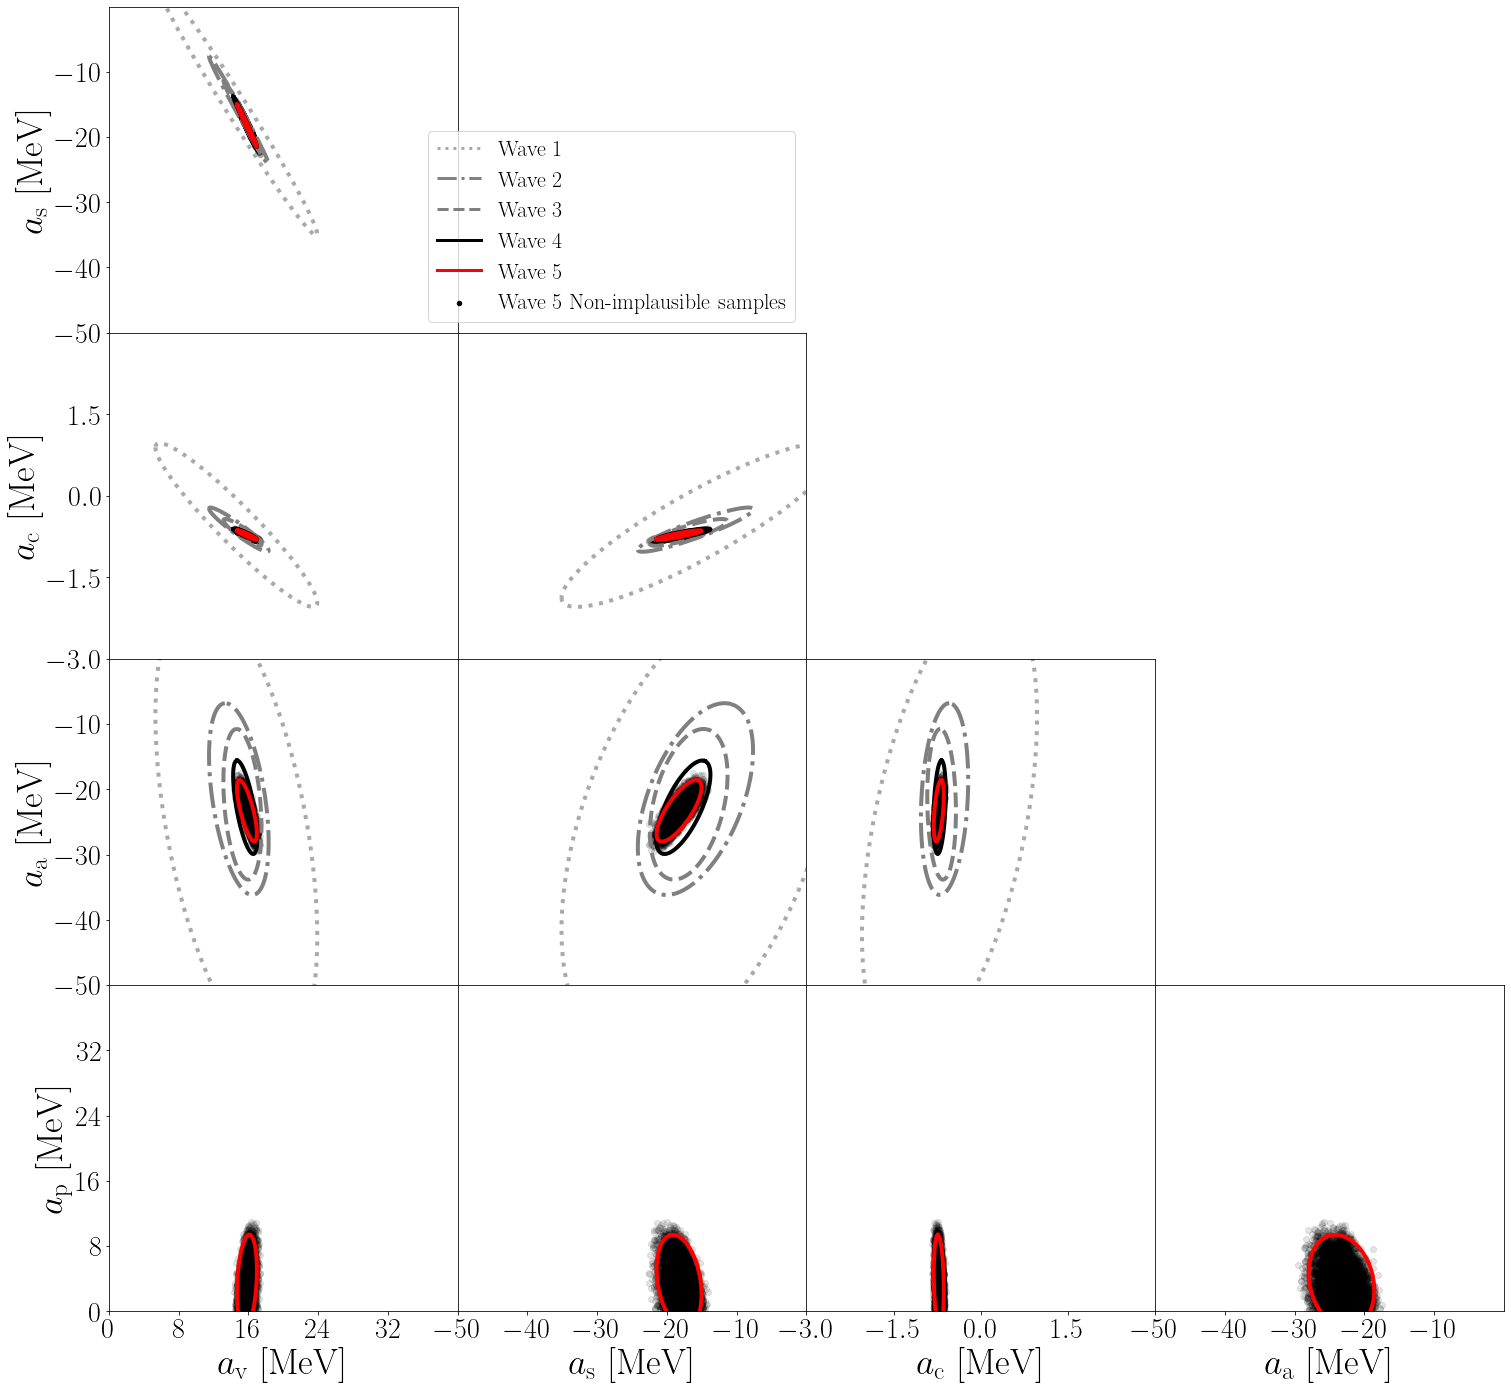

In [26]:
# plot corner plot of gaussian wave progression

importlib.reload(plot)

colors = ['darkgrey', 'grey', 'grey', 'black', 'red']
linestyles = [':', '-.', '--','-','-', '']
theta_names = [r'$a_{\mathrm{v}}$ [MeV]', r'$a_{\mathrm{s}}$ [MeV]', r'$a_{\mathrm{c}}$ [MeV]', r'$a_{\mathrm{a}}$ [MeV]', r'$a_{\mathrm{p}}$ [MeV]']
dec_list = [0,0,0,0,0,0]

fig, axes = plt.subplots(ndim, ndim-1, figsize=(25,30), sharex='col')

for k in range(5):
    
    # find mean and covariance of nonimplausible region
    nonimplausible = gaussian_nonimplausible[k]
    historymatch_cov = np.cov(nonimplausible[:,:-1].T)
    historymatch_mean = np.mean(nonimplausible[:,:-1], axis=0)
    
    if k < 4:
        dims = 4
    else:
        dims = 5
    
    # plot ellipses for each dimension
    for i in range(dims-1):
        for j in range(dims):
            ax = axes[j,i]
            
            if i != 0:
                ax.axes.yaxis.set_visible(False)
            #if j != 2:
                #ax.axes.xaxis.set_visible(False)
                
            if i < j:
                
                    
                param_cov = np.array([[historymatch_cov[i,i], historymatch_cov[i,j]],[historymatch_cov[j,i], historymatch_cov[j,j]]])
                param_mean = [historymatch_mean[i],historymatch_mean[j]]

                plot.get_cov_ellipse(param_cov, param_mean, 3, 5.991, ax, colors[k], linestyles[k], lw=4)
                    
                ax.set_xlabel(theta_names[i])
                ax.set_ylabel(theta_names[j])
                
                if k==4:
                    ax.scatter(gaussian_nonimplausible[-2][:,i][0:-1:10], gaussian_nonimplausible[-2][:,j][0:-1:10], alpha=0.1, color='black')
                
                # set limits to correspond to starting range
                ax.set_xlim([initial_parameter_bounds[i,0],initial_parameter_bounds[i,1]])
                ax.set_ylim([initial_parameter_bounds[j,0],initial_parameter_bounds[j,1]])

                ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0]*1.01, initial_parameter_bounds[i,1], 5),dec_list[i]), rotation = 45, ha="right")
                ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                
                #nbins = len(ax.get_xticklabels())
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))

            elif i == j:
                if i == 1:
                    pts = ax.scatter(100,100,color='black', s=20)
                    lines = [Line2D([0], [0], color=colors[c], linewidth=3, linestyle=linestyles[c]) for c in range(len(colors))]
                    lines.append(pts)
                    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5', 'Wave 5 Non-implausible samples']
                    ax.legend(lines, labels, loc='lower right')
                    ax.axis('off') 
                else:
                    ax.axis('off')    
            else:
                ax.axis('off')
                
for ax in axes[0, :]:
    fig.delaxes(ax)
                

fig.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout()
plt.savefig('figures/gaussian_corner.pdf', bbox_inches='tight', facecolor='white', transparent=False)

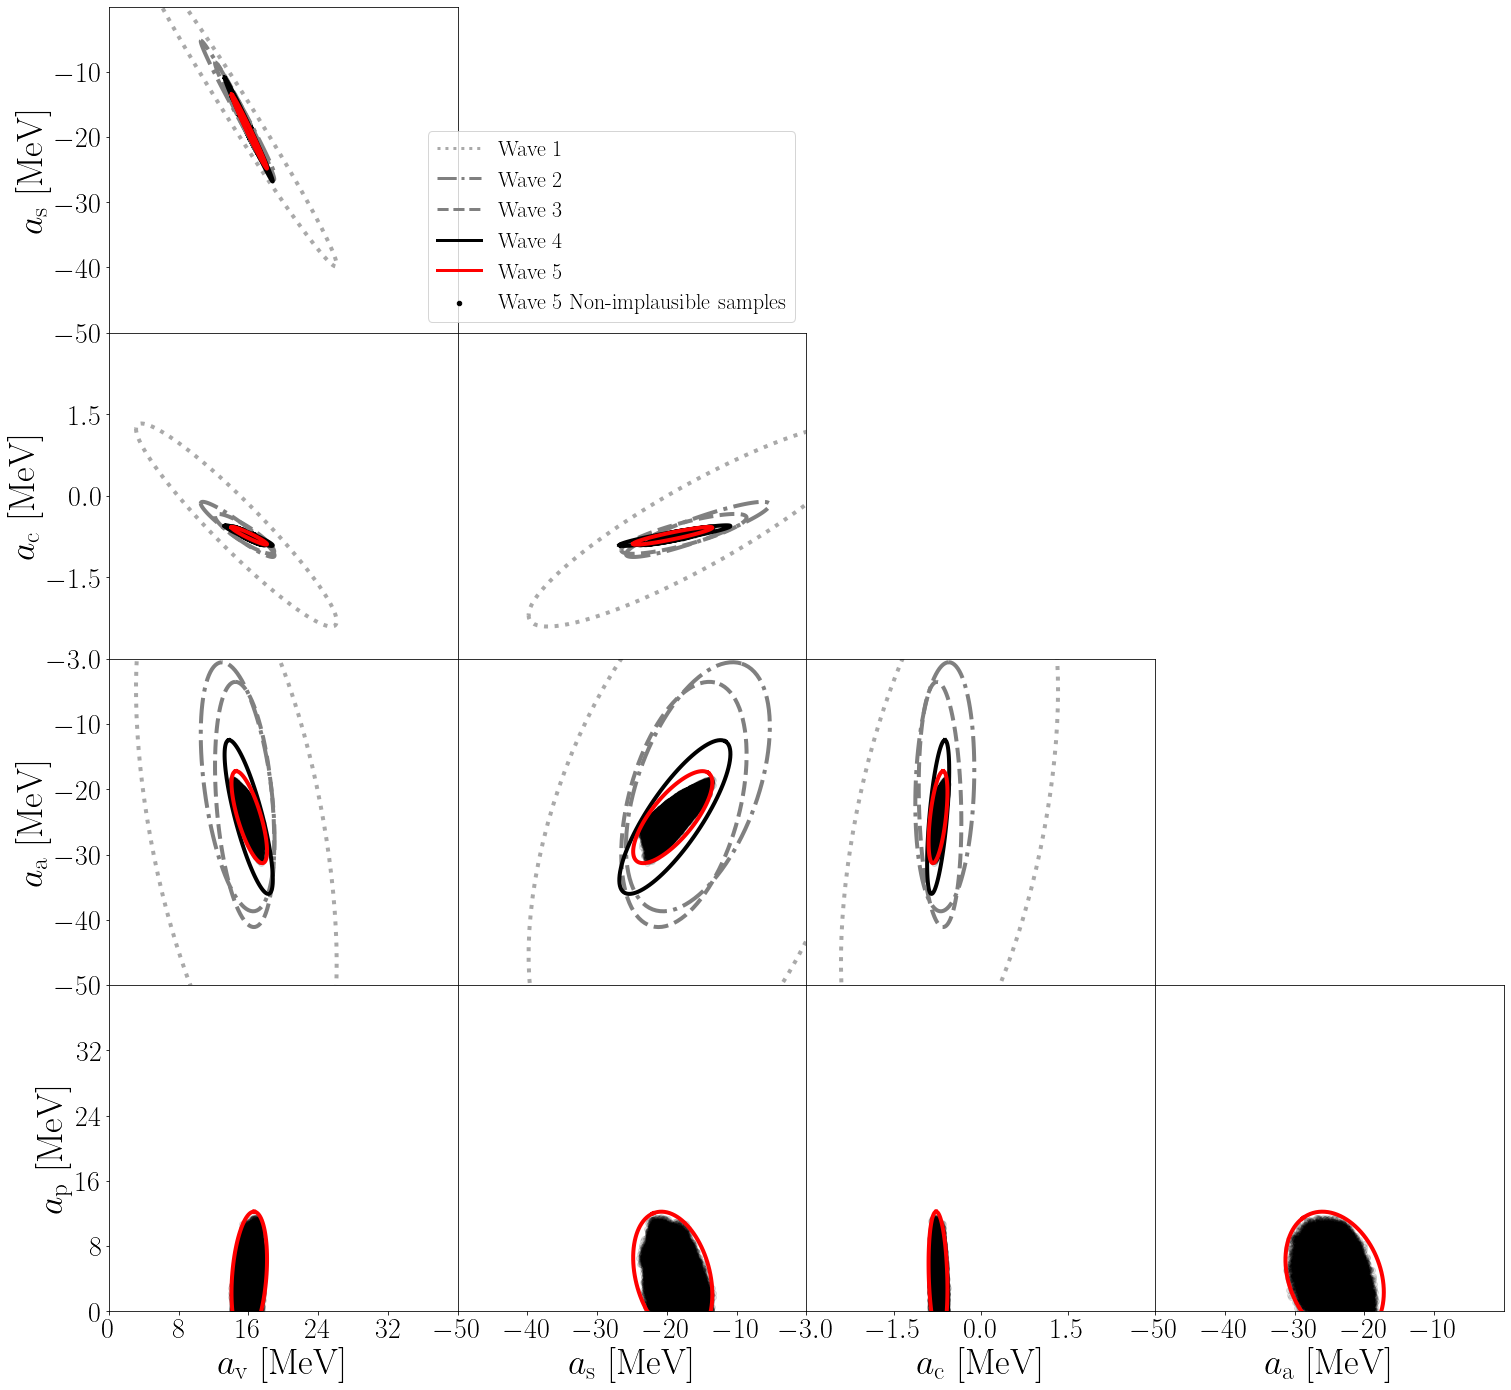

In [27]:
# plot corner plot of ellipsoid wave progression

importlib.reload(plot)

colors = ['darkgrey', 'grey', 'grey', 'black', 'red']
linestyles = [':', '-.', '--','-','-', '']
theta_names = [r'$a_{\mathrm{v}}$ [MeV]', r'$a_{\mathrm{s}}$ [MeV]', r'$a_{\mathrm{c}}$ [MeV]', r'$a_{\mathrm{a}}$ [MeV]', r'$a_{\mathrm{p}}$ [MeV]']
dec_list = [0,0,0,0,0,0]

fig, axes = plt.subplots(ndim, ndim-1, figsize=(25,30), sharex='col')

for k in range(5):
    
    # find mean and covariance of nonimplausible region
    nonimplausible = ellipsoid_nonimplausible[k]
    historymatch_cov = np.cov(nonimplausible[:,:-1].T)
    historymatch_mean = np.mean(nonimplausible[:,:-1], axis=0)
    
    if k < 4:
        dims = 4
    else:
        dims = 5
    
    # plot ellipses for each dimension
    for i in range(dims-1):
        for j in range(dims):
            ax = axes[j,i]
            
            if i != 0:
                ax.axes.yaxis.set_visible(False)
            #if j != 2:
                #ax.axes.xaxis.set_visible(False)
                
            if i < j:
                
                    
                param_cov = np.array([[historymatch_cov[i,i], historymatch_cov[i,j]],[historymatch_cov[j,i], historymatch_cov[j,j]]])
                param_mean = [historymatch_mean[i],historymatch_mean[j]]

                plot.get_cov_ellipse(param_cov, param_mean, 3, 9.210, ax, colors[k], linestyles[k], lw=4)
                    
                ax.set_xlabel(theta_names[i])
                ax.set_ylabel(theta_names[j])
                
                if k==4:
                    ax.scatter(ellipsoid_nonimplausible[k][:,i], ellipsoid_nonimplausible[k][:,j], alpha=0.1, color='black')
                
                # set limits to correspond to starting range
                ax.set_xlim([initial_parameter_bounds[i,0],initial_parameter_bounds[i,1]])
                ax.set_ylim([initial_parameter_bounds[j,0],initial_parameter_bounds[j,1]])

                ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0]*1.01, initial_parameter_bounds[i,1], 5),dec_list[i]), rotation = 45, ha="right")
                ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                
                #nbins = len(ax.get_xticklabels())
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                
                #ax.axis('square')

            elif i == j:
                if i == 1:
                    pts = ax.scatter(100,100,color='black', s=20)
                    lines = [Line2D([0], [0], color=colors[c], linewidth=3, linestyle=linestyles[c]) for c in range(len(colors))]
                    lines.append(pts)
                    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5', 'Wave 5 Non-implausible samples']
                    ax.legend(lines, labels, loc='lower right')
                    ax.axis('off') 
                else:
                    ax.axis('off')    
            else:
                ax.axis('off')
                
for ax in axes[0, :]:
    fig.delaxes(ax)

fig.subplots_adjust(wspace=0, hspace=0)


#fig.tight_layout()
plt.savefig('figures/ellipsoid_corner.pdf', bbox_inches='tight', facecolor='white', transparent=False)

600000
volume fraction (hypercube) : 20.3054253767781
600000
volume fraction (hypercube) : 1.0306296929047702
600000
volume fraction (hypercube) : 0.3694209943473131
600000
volume fraction (hypercube) : 0.0681003062502755
24000000
volume fraction (hypercube) : 0.004235405110884078


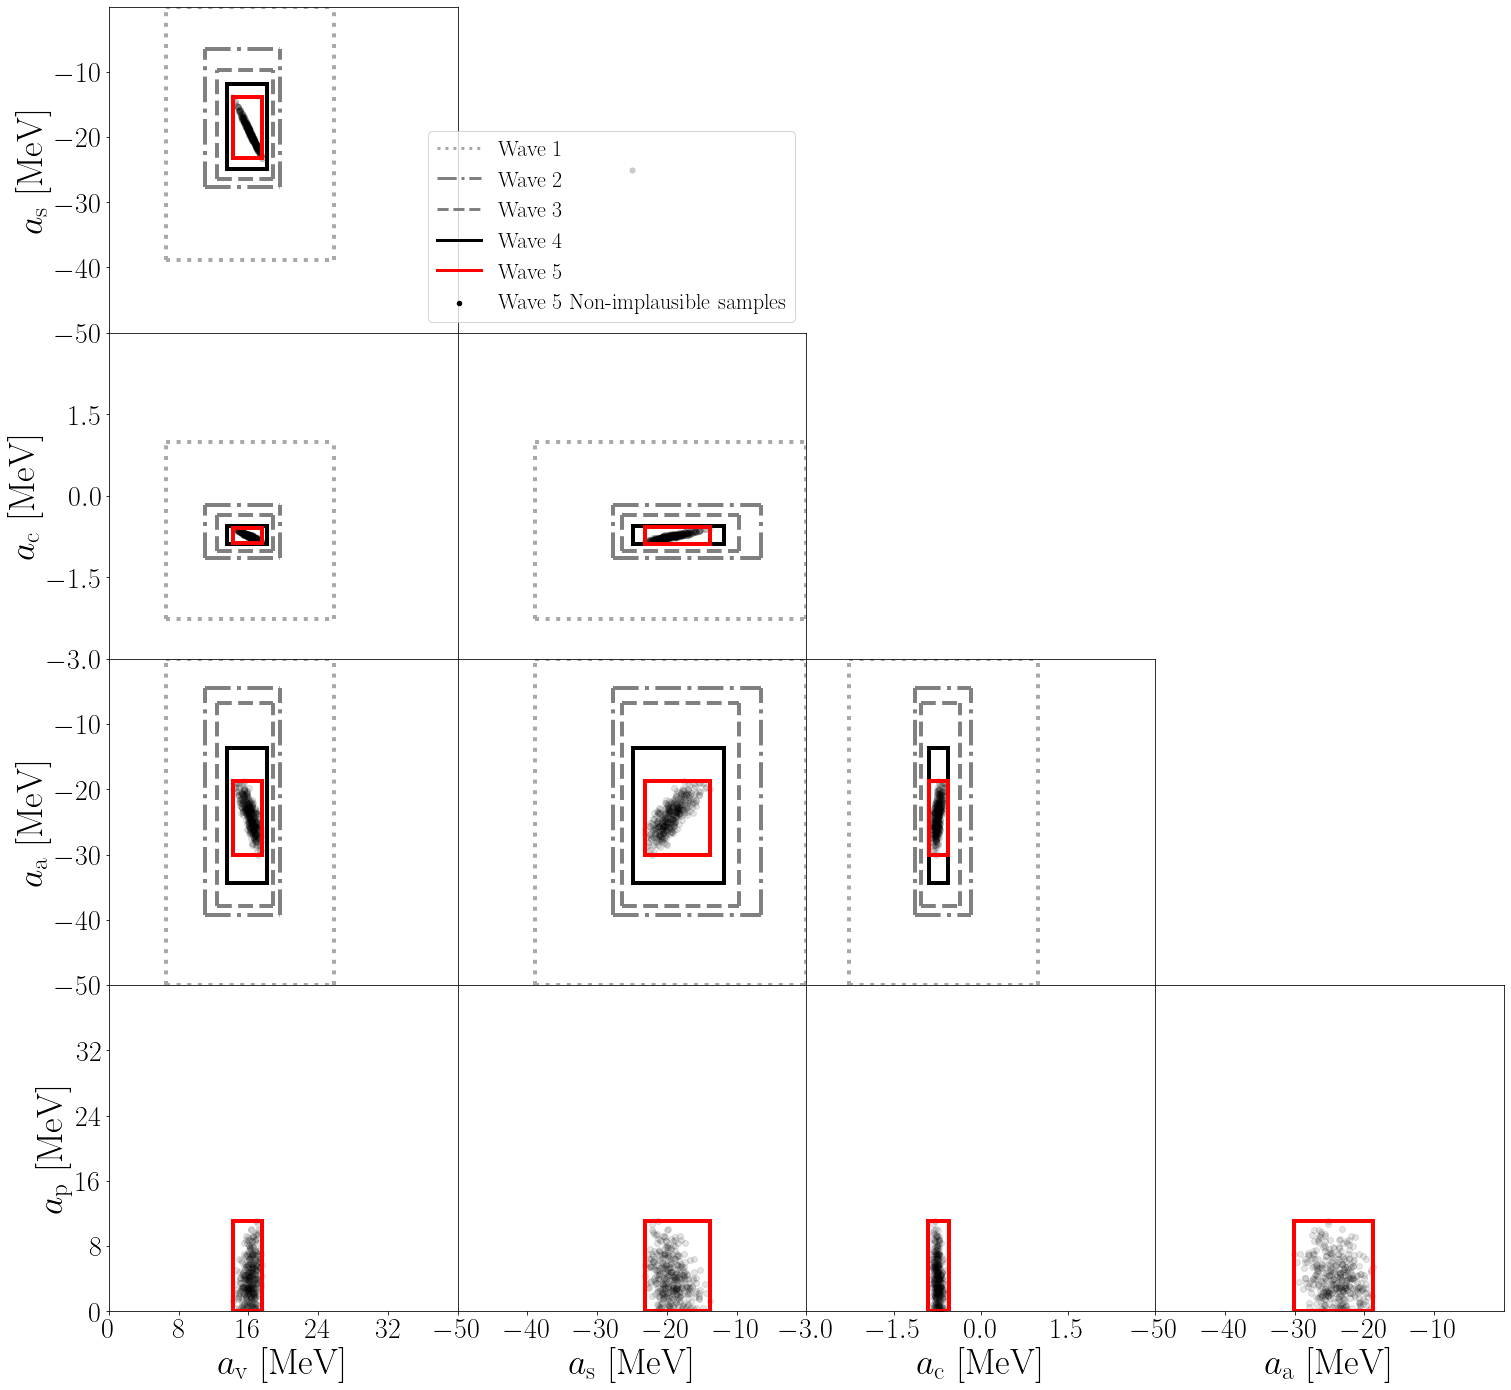

In [28]:
# plot corner plot of hypercube wave progression

hypercube_volumes = []

importlib.reload(plot)

colors = ['darkgrey', 'grey', 'grey', 'black', 'red']
linestyles = [':', '-.', '--','-','-','-', '-']
theta_names = [r'$a_{\mathrm{v}}$ [MeV]', r'$a_{\mathrm{s}}$ [MeV]', r'$a_{\mathrm{c}}$ [MeV]', r'$a_{\mathrm{a}}$ [MeV]', r'$a_{\mathrm{p}}$ [MeV]']
dec_list = [1,1,1,0,0,0]

fig, axes = plt.subplots(ndim, ndim-1, figsize=(25,30))

for k in range(5):
    
    if k < 4:
        dims = 4
    else:
        dims = 5
        
    # compute bounds of HC nonimplausible samples
    bounds_hypercube = utils.locate_boundaries(hypercube_nonimplausible[k], dims)
    
    volume = 1
    initial_volume = 1
    for i in range(dims):
        volume *= np.abs(bounds_hypercube[i,1]-bounds_hypercube[i,0])
        initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])
    print(initial_volume)
    print('volume fraction (hypercube) : ' + str(100*volume/initial_volume))
    hypercube_volumes.append(100*volume/initial_volume)
        
    # plot hypercubes for each dimension
    for i in range(dims-1):
        for j in range(dims):
            ax = axes[j,i]
                
            if i < j:
                
                if i != 0:
                    ax.axes.yaxis.set_visible(False)
                else:
                    ax.set_ylabel(theta_names[j])
                    
                if j == 4:
                    ax.set_xlabel(theta_names[i])
                else:
                    ax.axes.xaxis.set_visible(False)
                
                    
                #ax.grid(b=True, which='major', color='lightgrey', linestyle='--')
                
                if k==4:
                    ax.scatter(hypercube_nonimplausible[k][:,i], hypercube_nonimplausible[k][:,j], alpha=0.1, color='black')
                    bounds_hypercube[2,0] -= 0.005
                    bounds_hypercube[2,1] += 0.005
                    
                    
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,1]], [bounds_hypercube[j,0], bounds_hypercube[j,0]], color=colors[k], linestyle=linestyles[k], linewidth=4)
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,1]], [bounds_hypercube[j,1], bounds_hypercube[j,1]], color=colors[k], linestyle=linestyles[k], linewidth=4)
                
                ax.plot([bounds_hypercube[i,0], bounds_hypercube[i,0]], [bounds_hypercube[j,0], bounds_hypercube[j,1]], color=colors[k], linestyle=linestyles[k], linewidth=4)
                ax.plot([bounds_hypercube[i,1], bounds_hypercube[i,1]], [bounds_hypercube[j,0], bounds_hypercube[j,1]], color=colors[k], linestyle=linestyles[k], linewidth=4)
                
                
                # set limits to correspond to starting range
                ax.set_xlim([initial_parameter_bounds[i,0],initial_parameter_bounds[i,1]])
                ax.set_ylim([initial_parameter_bounds[j,0],initial_parameter_bounds[j,1]])

                ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 3),dec_list[i]), rotation = 45, ha="right")
                ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                
            elif i == j:
                if i == 1:
                    pts = ax.scatter(100,100,color='black', s=20)
                    lines = [Line2D([0], [0], color=colors[c], linewidth=3, linestyle=linestyles[c]) for c in range(len(colors))]
                    lines.append(pts)
                    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5', 'Wave 5 Non-implausible samples']
                    ax.legend(lines, labels, loc='lower right')
                    ax.axis('off') 
                else:
                    ax.axis('off')    
            else:
                ax.axis('off')
                
                
for ax in axes[0, :]:
    fig.delaxes(ax)

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/hypercube_corner.pdf', bbox_inches='tight', facecolor='white', transparent=False)


In [30]:
def bounding_rectangle(x, y, theta):
    
    #calculate center
    cx = np.mean(x)
    cy = np.mean(y)

    #Translate center to origin
    xt = x - cx
    yt = y - cy

    #Rotate by angle
    xr = xt * np.cos(theta) - yt * np.sin(theta)
    yr = xt * np.sin(theta) + yt * np.cos(theta)

    #Find the min and max in rotated space
    minx_r = np.min(xr)
    miny_r = np.min(yr)
    maxx_r = np.max(xr)
    maxy_r = np.max(yr)
    #Set up the minimum and maximum points of the bounding rectangle    
    xbound_r = np.asarray([minx_r, minx_r, maxx_r, maxx_r,minx_r])
    ybound_r = np.asarray([miny_r, maxy_r, maxy_r, miny_r,miny_r])
    
    #Rotate and Translate back to (cx, cy)
    xbound = (xbound_r * np.cos(-theta) - ybound_r * np.sin(-theta))+cx
    ybound = (xbound_r * np.sin(-theta) + ybound_r * np.cos(-theta))+cy
    
    return xbound, ybound, minx_r, maxx_r, miny_r, maxy_r

41.16000297972621
2.7029468417015887
0.9755394483021324
50.59224346349738
volume fraction (hypercube) : 0.9151460842551623
25.329531348091344
0.7992693211026847
0.3089855531738575
38.80425188072283
volume fraction (hypercube) : 0.0404563349856391
19.00994021539112
1.0403113342444696
0.3331657932855827
32.385105286838865
volume fraction (hypercube) : 0.03556301307254703
14.612179248178672
0.5738191224239353
0.10879372848495651
23.8229517514985
volume fraction (hypercube) : 0.0036219144630346297
10.99549848650079
0.3820743388950003
0.07477011101989352
14.194127682244957
11.784585176270294
volume fraction (hypercube) : 0.00021892864267748378


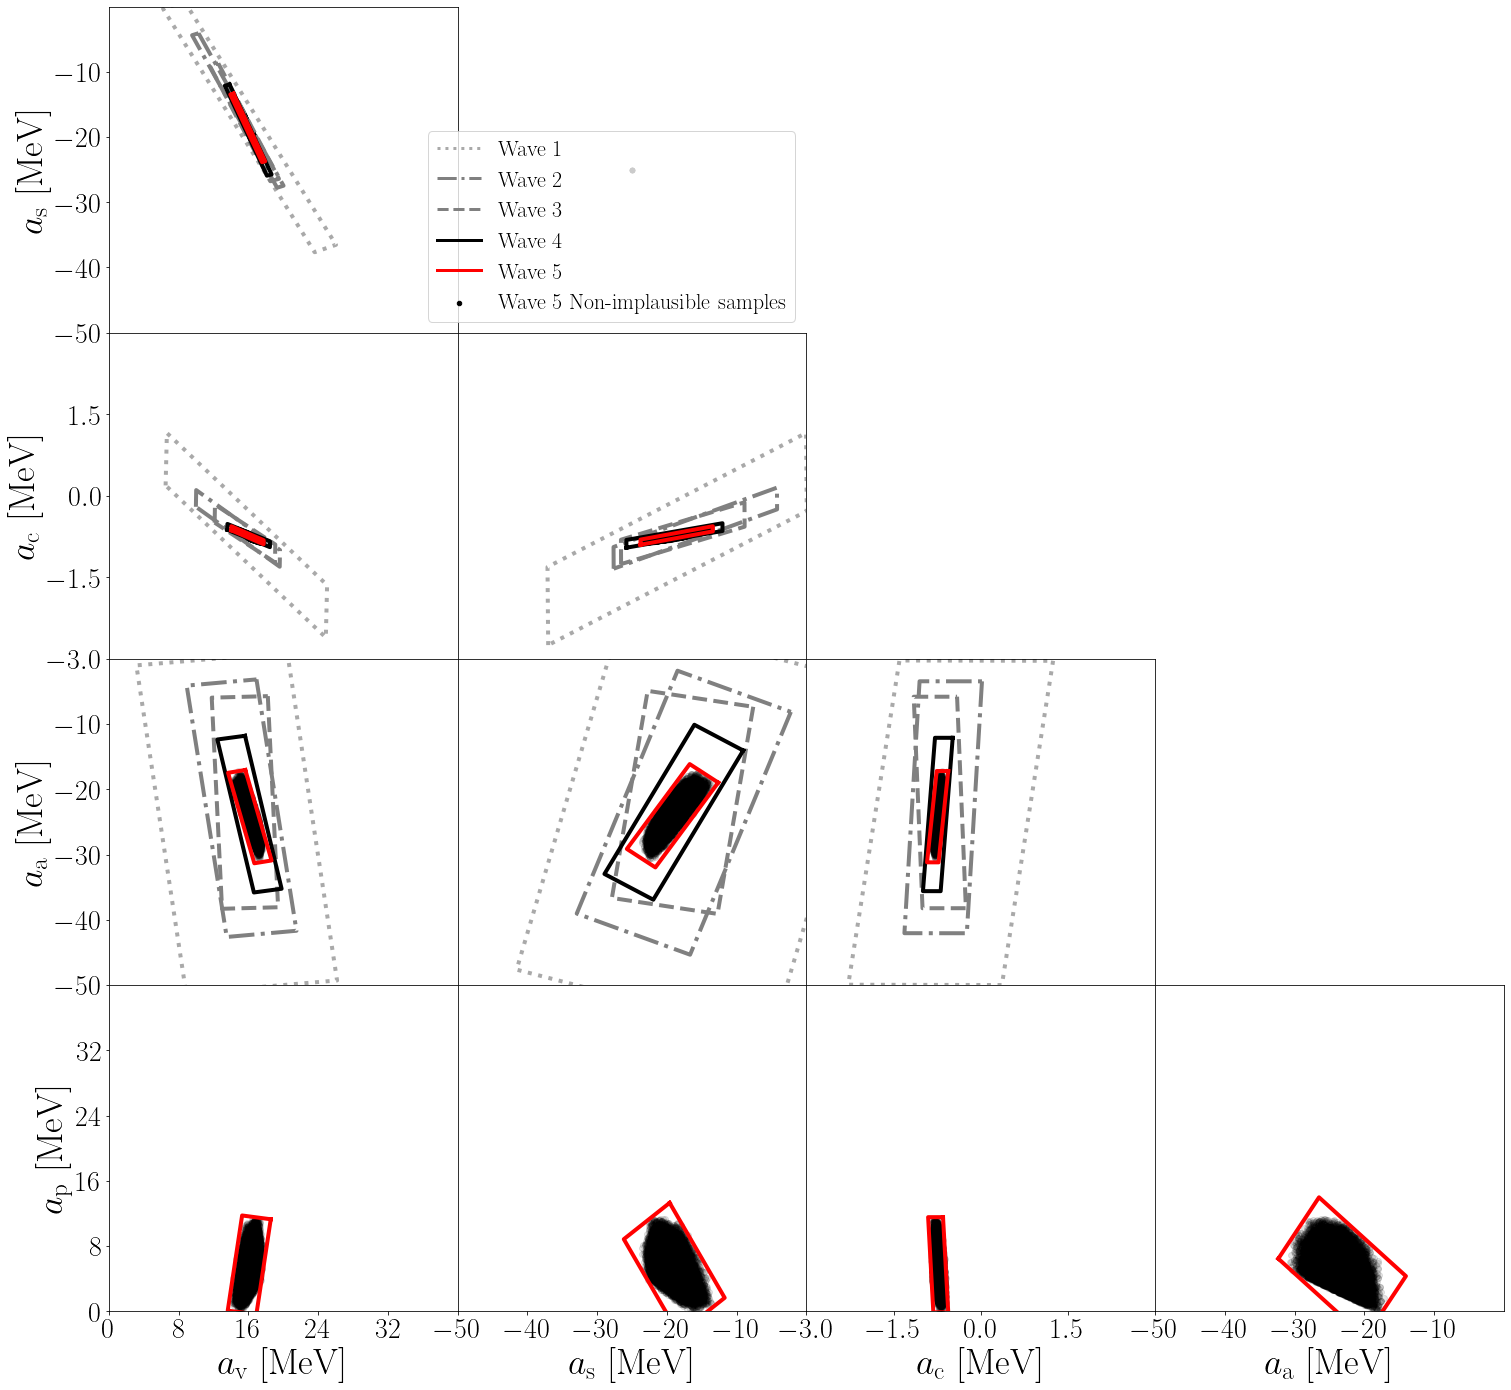

In [31]:
# plot corner plot of rotated hypercube wave progression

importlib.reload(plot)

colors = ['darkgrey', 'grey', 'grey', 'black', 'red']
linestyles = [':', '-.', '--','-','-', '-']
theta_names = [r'$a_{\mathrm{v}}$ [MeV]', r'$a_{\mathrm{s}}$ [MeV]', r'$a_{\mathrm{c}}$ [MeV]', r'$a_{\mathrm{a}}$ [MeV]', r'$a_{\mathrm{p}}$ [MeV]']
dec_list = [1,1,1,0,0,0]

fig, axes = plt.subplots(ndim, ndim-1, figsize=(25,30))

for k in range(5):
    
    if k < 4:
        dims = 4
    else:
        dims = 5
        
    nonimplausible = hypercube_rot_nonimplausible[k]
    historymatch_cov = np.cov(nonimplausible[:,:-1].T)
    
    volume = 1
    initial_volume = 1
    for i in range(dims):
        initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])
    
   
    # plot hypercubes for each dimension
    for i in range(dims-1):
        for j in range(dims):
            ax = axes[j,i]
                
            if i < j:
                
                # calculate angle of rotation
                param_cov = np.array([[historymatch_cov[i,i], historymatch_cov[i,j]],[historymatch_cov[j,i], historymatch_cov[j,j]]])
                _eigvals, eigvecs = np.linalg.eig(param_cov)
                vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
                theta = np.arctan2(vy, vx)
                
                # find bounding rectangle
                xr, yr, minxr, maxxr, minyr, maxyr = bounding_rectangle(nonimplausible[:,i], nonimplausible[:,j], -theta)
                
                if i == 0:
                    # calculate length in y direction for volume for first column
                    volume *= np.abs(maxyr-minyr)
                    print(np.abs(maxyr-minyr))
                    if j == 1:
                        volume *= np.abs(maxxr-minxr)
                        print(np.abs(maxxr-minxr))
                        
                if j == 4:
                    ax.set_xlabel(theta_names[i])
                else:
                    ax.axes.xaxis.set_visible(False)
                
                if i != 0:
                    ax.axes.yaxis.set_visible(False)
                
                ax.plot(xr, yr, color=colors[k], linestyle=linestyles[k], linewidth=4)
                
                    
                if k==4:
                    ax.scatter(hypercube_rot_nonimplausible[k][:,i][0:-1:10], hypercube_rot_nonimplausible[k][:,j][0:-1:10], alpha=0.1, color='black')
                    #pts = ax.scatter(100,100,color='black', s=20)
                    #if i == 0 and j == 1:
                        #lines = [Line2D([0], [0], color=colors[c], linewidth=3, linestyle=linestyles[c]) for c in range(len(colors))]
                        #lines.append(pts)
                        #labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5', 'Wave 5 Non-implausible samples']
                        #ax.legend(lines, labels, loc='upper right')
                    
                ax.set_ylabel(theta_names[j])
                
                # set limits to correspond to starting range
                
                ax.set_xlim([initial_parameter_bounds[i,0],initial_parameter_bounds[i,1]])
                ax.set_ylim([initial_parameter_bounds[j,0],initial_parameter_bounds[j,1]])

                ax.set_xticks(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 5))
                #ax.set_xticklabels(np.around(np.linspace(initial_parameter_bounds[i,0], initial_parameter_bounds[i,1], 3),dec_list[i]), rotation = 45, ha="right")
                ax.set_yticks(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5))
                #ax.set_yticklabels(np.around(np.linspace(initial_parameter_bounds[j,0], initial_parameter_bounds[j,1], 5),dec_list[j]), rotation = 45, ha="right")
                
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5,prune='upper'))
                
                #ax.set_aspect('equal')
                
            elif i == j:
                if i == 1:
                    pts = ax.scatter(100,100,color='black', s=20)
                    lines = [Line2D([0], [0], color=colors[c], linewidth=3, linestyle=linestyles[c]) for c in range(len(colors))]
                    lines.append(pts)
                    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5', 'Wave 5 Non-implausible samples']
                    ax.legend(lines, labels, loc='lower right')
                    ax.axis('off') 
                else:
                    ax.axis('off')    
            else:
                ax.axis('off')
                
    print('volume fraction (hypercube) : ' + str(100*volume/initial_volume))
    
for ax in axes[0, :]:
    fig.delaxes(ax)

fig.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout()
plt.savefig('figures/hypercube_rot_corner.pdf', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(hypercube_rot_samples[3][:,2], hypercube_rot_samples[3][:,4], alpha=0.5, color='black')
ax.scatter(hypercube_rot_nonimplausible[4][:,2], hypercube_rot_nonimplausible[4][:,4], alpha=0.5, color='red')
#ax.scatter(gaussian_nonimplausible[3][:,1], gaussian_nonimplausible[3][:,3], alpha=0.5, color='blue')
#ax.scatter(hypercube_nonimplausible[3][:,1], hypercube_nonimplausible[3][:,3], alpha=0.5, color='black')


In [ ]:
importlib.reload(plot)
fig, axes = plt.subplots(ndim, ndim, figsize=(50,50))

plot.plotcorner(gaussian_samples[-1], initial_parameter_bounds, 5, bins=50, Fig= (fig, axes), colorbar=False,
                show_axes = 'all', labels=theta_names, plot1D_kwargs=None, plot2D_kwargs=None)

historymatch_cov_final = np.cov(gaussian_nonimplausible[-1][:,:-1].T)
historymatch_mean_final = np.mean(gaussian_nonimplausible[-1][:,:-1], axis=0)
'''
for i in range(dims):
    for j in range(dims):
        ax = axes[j,i]
        if i == j:
            ax_right = ax.twinx()
            ax_right.plot(a_range, stats.norm.pdf(parameter_ranges[i], historymatch_mean_final[i], np.sqrt(historymatch_cov_final[i,i])), color='red', linewidth=3)
                    #if k == 4:
                        #ax.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], mean[i], np.sqrt(cov[i,i])), color='cornflowerblue',linewidth=3)
                    #ax_right.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(analytic_cov[i,i])), color='black')
                    #ax_right.axes.yaxis.set_visible(False)
                    #ax.set_xlim([sample_bounds[i][0],sample_bounds[i][1]])
                    #ax.set_title(str(theta_names[i]) + '=' + str(round(theta_best[i], 2)), fontsize=14)'''
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/gaussian_opticaldepth.png', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
def volume_ellipse(chi, cov, n):
    
    # find axes lengths
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Set of all spherical angles to draw our ellipsoid
    n_points = 100
    theta = np.linspace(0, 2*np.pi, n_points)
    phi = np.linspace(0, np.pi, n_points)

    # Width, height and depth of ellipsoid
    #axes = np.sqrt(12.838) * np.sqrt(eigvals) # 99.5
    axes = np.sqrt(chi) * np.sqrt(eigvals) # 95
    
    #https://www.whitman.edu/documents/Academics/Mathematics/2014/jorgenmd.pdf
    vol = np.prod(axes)
    if n == 4:
        # for n = 4, gamma function(4/2) = (1)! = 1
        factor = 2*(np.pi**(n/2))/n
        #print(factor)
        return vol*factor
    else:
        # for n = 5, wanna gamma(5/2) = (3/4)sqrt(pi)
        factor = 2*(np.pi**(n/2))/(n*(3/4)*np.sqrt(np.pi))
        return vol*factor

In [ ]:
gaussian_volumes = []

for k in range(4):
    
    # initial volume
    initial_volume = 1
    for i in range(4):
        initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])
    
    gaussian_volume = volume_ellipse(9.488, np.cov(gaussian_nonimplausible[k][:,:-1].T), 4)
    gaussian_volumes.append(gaussian_volume/initial_volume)
    print('Gaussian volume (emulator) : ' + str(100*gaussian_volume/initial_volume) + '%')

# final 2 waves
for k in range(4,5):
    initial_volume = 1
    for i in range(5):
        initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])
    
    gaussian_volume = volume_ellipse(11.070, np.cov(gaussian_nonimplausible[k][:,:-1].T), 5)
    gaussian_volumes.append(gaussian_volume/initial_volume)
    print('Gaussian volume (emulator) : ' + str(100*gaussian_volume/(0.95*initial_volume)) + '%')


In [ ]:
# ellipsoid volumes

ellipsoid_volumes = []


# initial volume
initial_volume = 1
for i in range(4):
    initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])

for k in range(4):
    ellipsoid_volume = volume_ellipse(9.488, np.cov(ellipsoid_nonimplausible[k][:,:-1].T), 4)
    #print(ellipsoid_volume)
    print('ellipsoid volume (emulator) : ' + str(100*ellipsoid_volume/initial_volume) + '%')
    ellipsoid_volumes.append(ellipsoid_volume/initial_volume)
    
# final 2 waves

# initial volume
initial_volume *= np.abs(initial_parameter_bounds[-1,1]-initial_parameter_bounds[-1,0])

for k in range(4,5):
    
    ellipsoid_volume = volume_ellipse(11.070, np.cov(ellipsoid_nonimplausible[k][:,:-1].T), 5)
    #print(ellipsoid_volume)
    print('ellipsoid volume (emulator) : ' + str(100*ellipsoid_volume/(initial_volume)) + '%')
    
    
    for k in range(4,5):
    
        ellipsoid_volume = volume_ellipse(11.070, np.cov(ellipsoid_nonimplausible[k][:,:-1].T), 5)
        #print(ellipsoid_volume)
        ellipsoid_volumes.append(ellipsoid_volume/initial_volume)
        print('ellipsoid volume (emulator) : ' + str(100*ellipsoid_volume/(initial_volume)) + '%')

In [ ]:
# rotated hypercube volumes

hc_rot_volumes = []

# initial volume
initial_volume = 1
for i in range(4):
    initial_volume *= np.abs(initial_parameter_bounds[i,1]-initial_parameter_bounds[i,0])
print(initial_volume)

for k in range(4):
    
    covariance = np.cov(hypercube_rot_nonimplausible[k][:,:-1].T)
    
    chisq = chi2.ppf(0.95, 4) # 95% C.I. chisq value
    covariance *= chisq
    
    _eigvals, eigvecs = np.linalg.eigh(covariance)
    
    print('Total Volume = ' + str(np.prod(2*np.sqrt(_eigvals))))
    hc_rot_volumes.append(np.prod(2*np.sqrt(_eigvals))/initial_volume)
    print('Rotated Hypercube volume  : ' + str(100*np.prod(2*np.sqrt(_eigvals))/initial_volume) + '%')
    
    #ax.scatter(hypercube_rot_samples[k][:,0],hypercube_rot_samples[k][:,1])
    #ax2.scatter(hypercube_rot_samples[k][:,2],hypercube_rot_samples[k][:,3])
    
    #ax2.scatter(nonimp_straight[:,0],nonimp_straight[:,1])
    #ax.scatter(nonimp_straight[:,2],nonimp_straight[:,3])
    
initial_volume *= np.abs(initial_parameter_bounds[-1,1]-initial_parameter_bounds[-1,0])
covariance = np.cov(hypercube_rot_samples[4][:,:-1].T)
    
chisq = chi2.ppf(0.95, 5) # 95% C.I. chisq value
covariance *= chisq
    
_eigvals, eigvecs = np.linalg.eigh(covariance)

print('Total Volume = ' + str(np.prod(2*np.sqrt(_eigvals))))

hc_rot_volumes.append(np.prod(2*np.sqrt(_eigvals))/initial_volume)

print('Rotated Hypercube volume  : ' + str(100*np.prod(2*np.sqrt(_eigvals))/initial_volume) + '%')


In [ ]:
# plot showing progression of mean compared to analytical mean

fig, axes = plt.subplots(1,4, figsize=(40,10))

means_gaussian = np.zeros((4,6))
means_hypercube = np.zeros((4,6))

for i in range(4):
    av_mean_true = [analytic_means[0][i],analytic_means[1][i],analytic_means[2][i],analytic_means[3][i],analytic_means[4][i],analytic_means[4][i]]
    ax = axes[i]
    for k in range(6):
        # find mean of gaussian in each wave
        historymatch_mean = np.mean(gaussian_nonimplausible[k][:,:-1], axis=0)
        means_gaussian[i,k] = historymatch_mean[i]
        # find mean of hypercube in each wave
        if k < 4:
            bounds_hypercube = utils.locate_boundaries(hypercube_nonimplausible[k], 4)
        else:
            bounds_hypercube = utils.locate_boundaries(hypercube_nonimplausible[k], 5)
        #av_mean_hypercube.append((bounds_hypercube[0,1] + bounds_hypercube[0,0])/2)
        means_hypercube[i,k] = (bounds_hypercube[i,1] + bounds_hypercube[i,0])/2

    ax.plot(np.arange(1,7,1), av_mean_true, marker='o', color='black')
    ax.plot(np.arange(1,7,1), means_gaussian[i], marker='o', color='blue')
    #ax.plot(np.arange(1,7,1), means_hypercube[i], marker='o', color='red')


In [ ]:
# plot comparing volumes of hc rot and ellipsoid

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(np.arange(1,6,1), hypercube_volumes, color='red', linestyle='-', marker="s", ms=6, label='Rotated Hypercube')
ax.plot(np.arange(1,6,1), hc_rot_volumes, color='magenta', linestyle='-', marker="s", ms=6, label='Rotated Hypercube')
ax.plot(np.arange(1,6,1), ellipsoid_volumes, color='limegreen', linestyle='-', marker="s", ms=6, label='Ellipsoid')
ax.plot(np.arange(1,6,1), gaussian_volumes, color='blue', linestyle='-', marker="s", ms=6, label='Gaussian')


ax.set_yscale('log')
ax.legend(loc='best')
ax.set_ylabel(r'Volume [\%]')
ax.set_xlabel('Wave')

